||||||||||||||||||||||||||||||||||||||||    

IEEE Computational Intelligence Society · Research Prediction

**Fraud Detection**

|||||||||||||||||||||||||||||||||||||||||    

Categorical Features - Transaction:
ProductCD,
card1 - card6,
addr1, addr2,
P_emaildomain,
R_emaildomain,
M1 - M9

Categorical Features - Identity:
DeviceType,
DeviceInfo,
id_12 - id_38

# Packages

In [134]:
!pip install missingno ydata-profiling yellowbrick shap

In [135]:
!pip install -U ydata-profiling

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

from pathlib import Path
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, DiscriminationThreshold

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             ConfusionMatrixDisplay,
                             confusion_matrix,
                             classification_report,
                            )
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     cross_validate,
                                     cross_val_predict,
                                     GridSearchCV,
                                     learning_curve,
                                    )
from sklearn import set_config
set_config(display="diagram", print_changed_only=True)

In [136]:
import os
import random
random.seed(42)
np.random.seed(42)

# 0.Data collection

In [ ]:
# Entrer le chemin d'accès correspondant à votre machine
HOME_DIR = r"C:\Users\HP\Desktop\LESLYE\ISEP2\S2\MACHINE_LEARNING\01-ieee-fraud-detection" #charger le chemin d'acces

In [ ]:
plt.style.use('ggplot')  #Applique un style de graphique proche de ggplot2 (R).
%matplotlib inline
#Affiche les graphiques directement dans le notebook.

pd.set_option('display.max_rows', 500)   # Affiche jusqu'à 500 lignes
pd.set_option('display.max_columns', 500)  # Affiche jusqu'à 500 colonnes
pd.set_option('display.width', 1000)     # Largeur d'affichage

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [140]:
datasets = {
    "identity": identity,
    "transaction": transaction
}

# Afficher la taille de chaque dataset
for name, df in datasets.items():
    print(f"{name} : {df.shape[0]} lignes, {df.shape[1]} colonnes")

identity : 144233 lignes, 41 colonnes
transaction : 590540 lignes, 394 colonnes


In [141]:
transaction_ids_transaction = set(transaction['TransactionID'].unique())
transaction_ids_identity = set(identity['TransactionID'].unique())

In [142]:
# Vérifier si tous les transactionid de identity sont dans transaction
ids_in_transaction = transaction_ids_identity.issubset(transaction_ids_transaction)

# Vérifier si tous les transactionid de transaction sont dans identity
ids_in_identity = transaction_ids_transaction.issubset(transaction_ids_identity)

print("Tous les transactionid de identity sont-ils dans transaction ? :", ids_in_transaction)
print("Tous les transactionid de transaction sont-ils dans identity ? :", ids_in_identity)


Tous les transactionid de identity sont-ils dans transaction ? : True
Tous les transactionid de transaction sont-ils dans identity ? : False


#  1.For Data Cleaning 

Variables Catégorielles: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')
Variables Numériques: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)


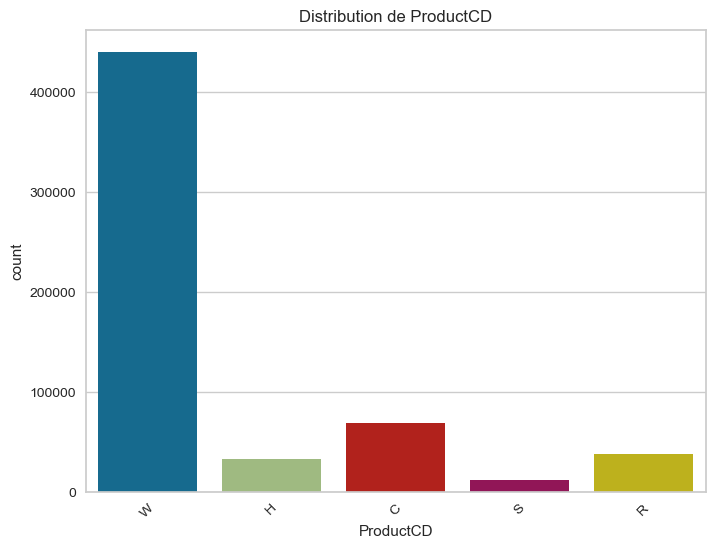

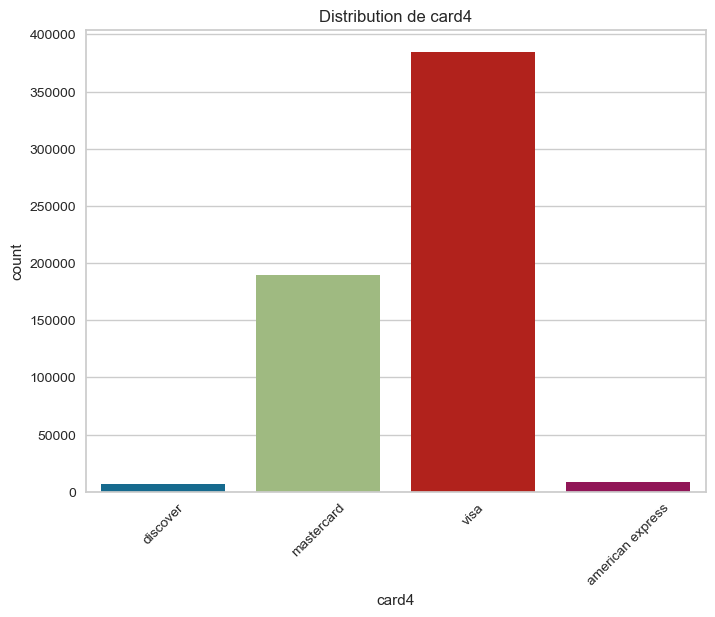

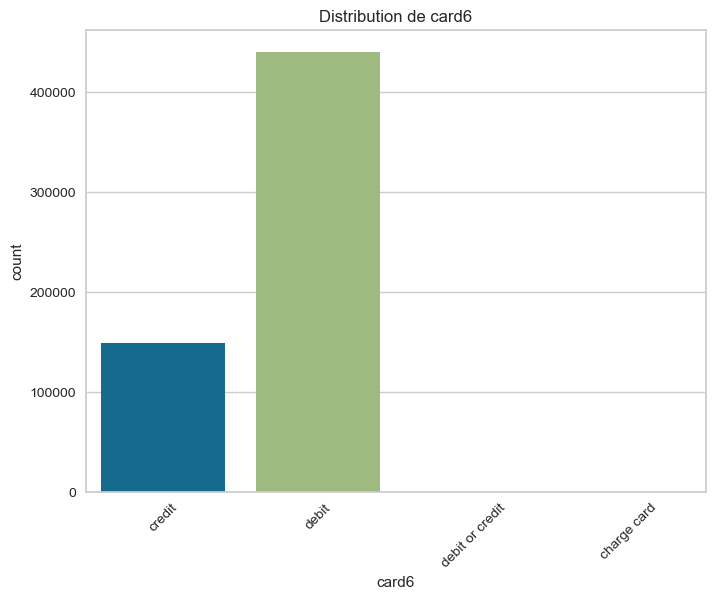

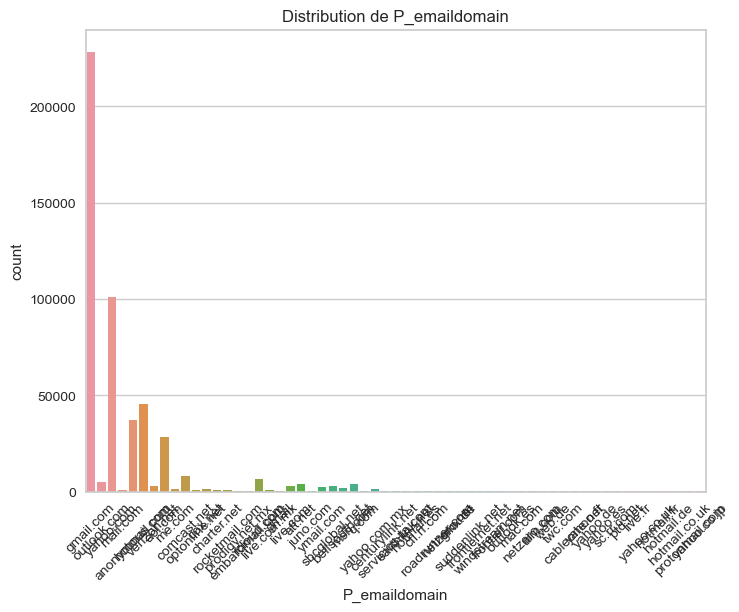

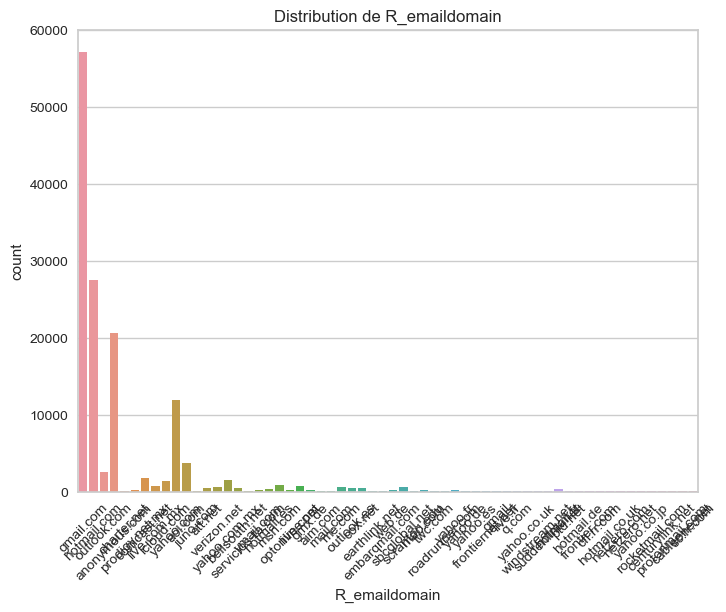

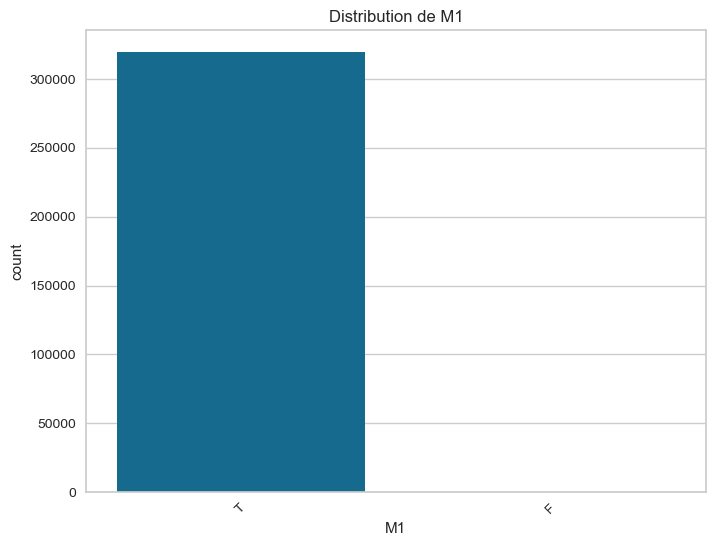

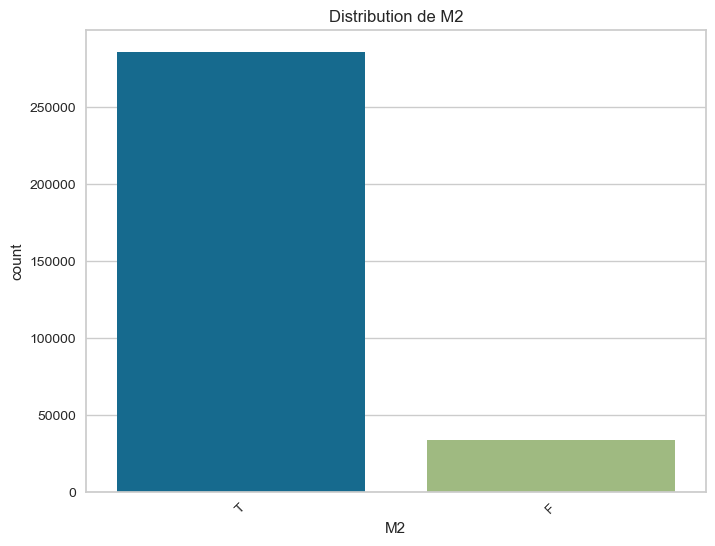

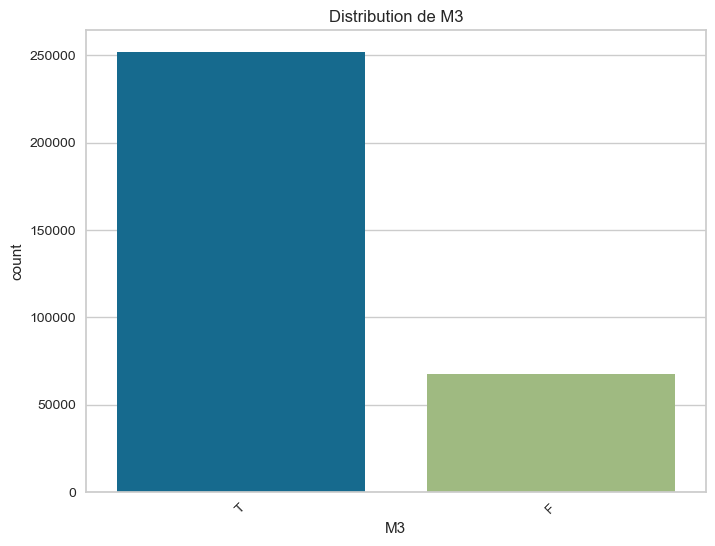

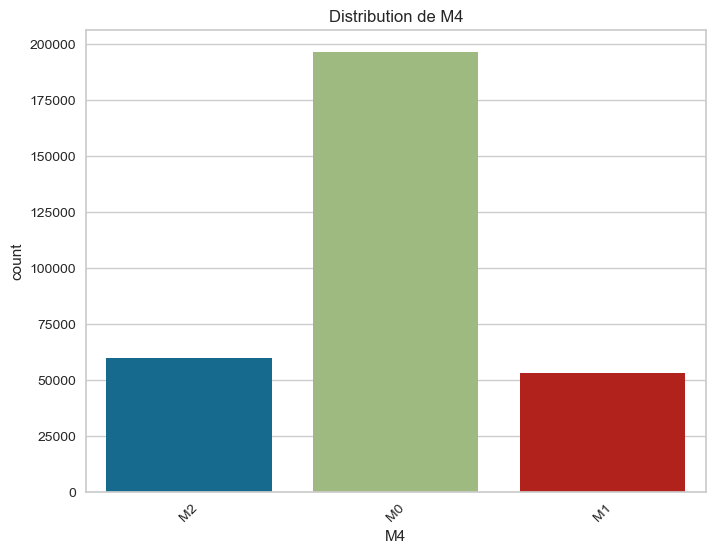

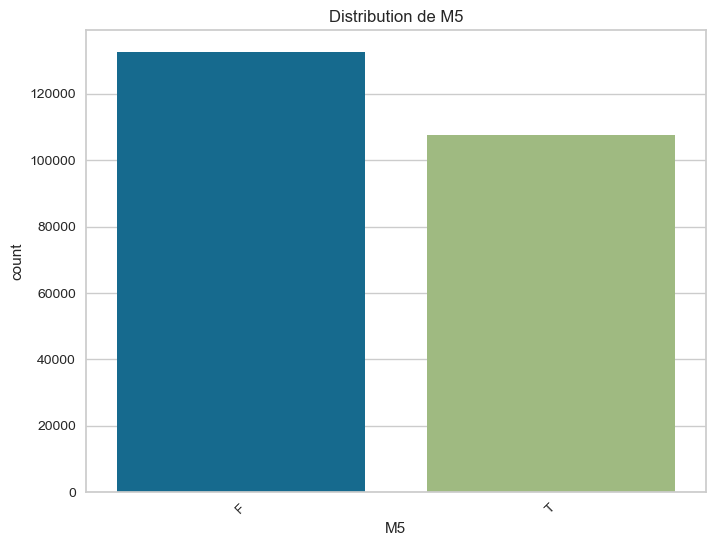

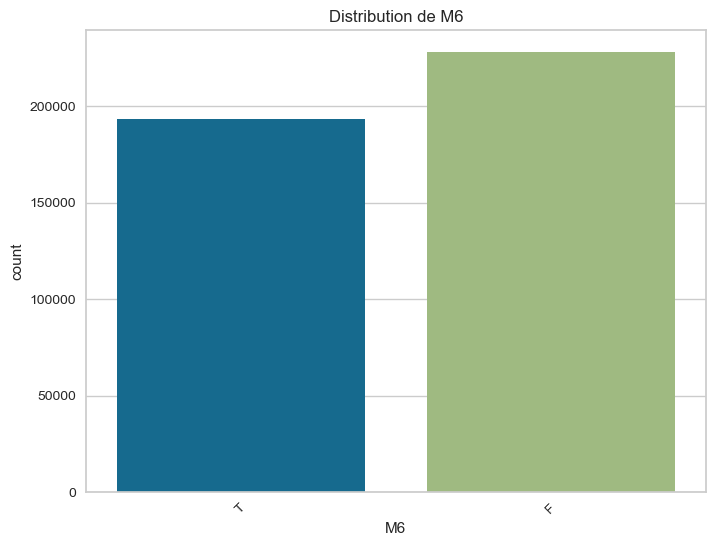

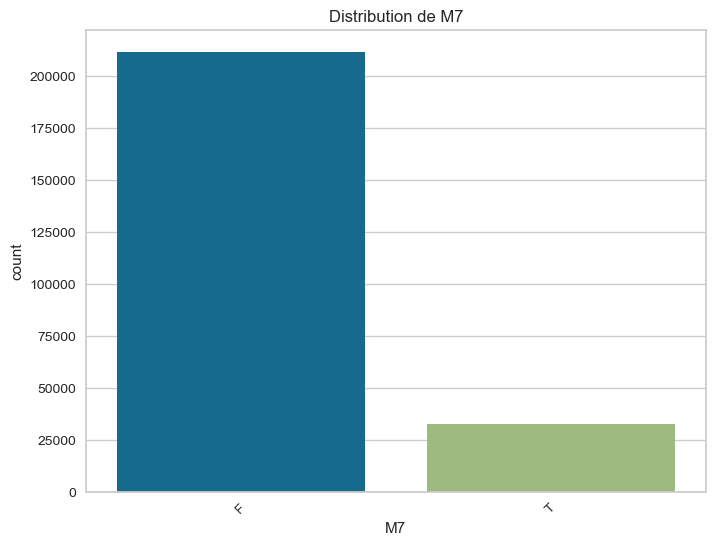

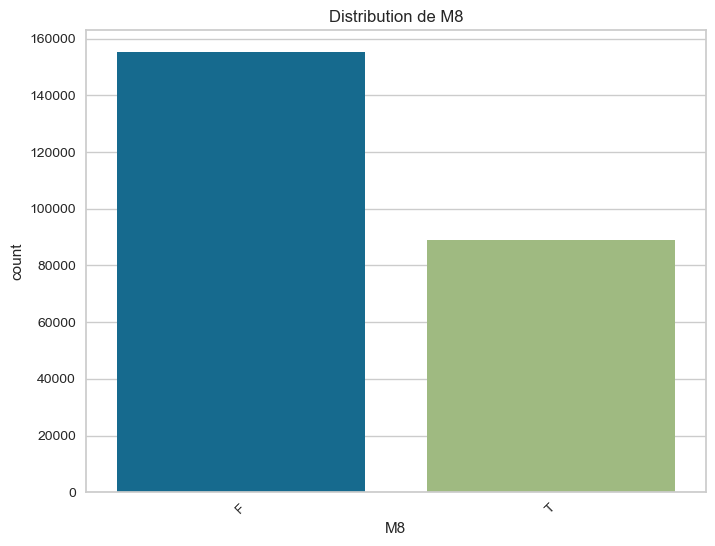

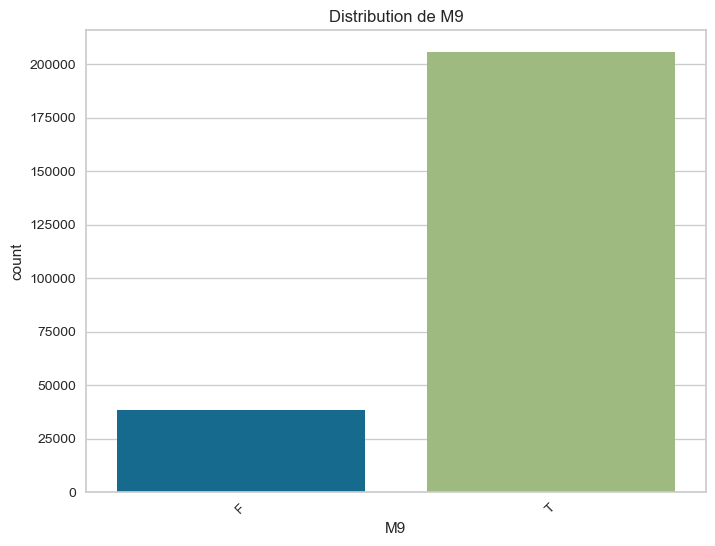

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


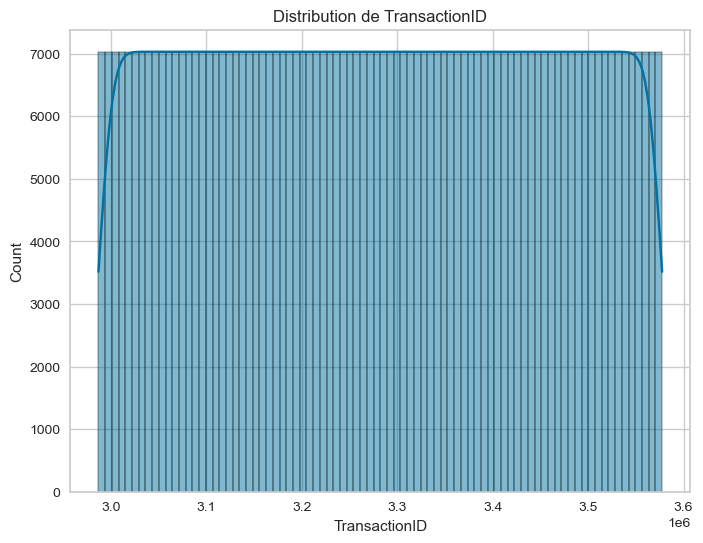

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


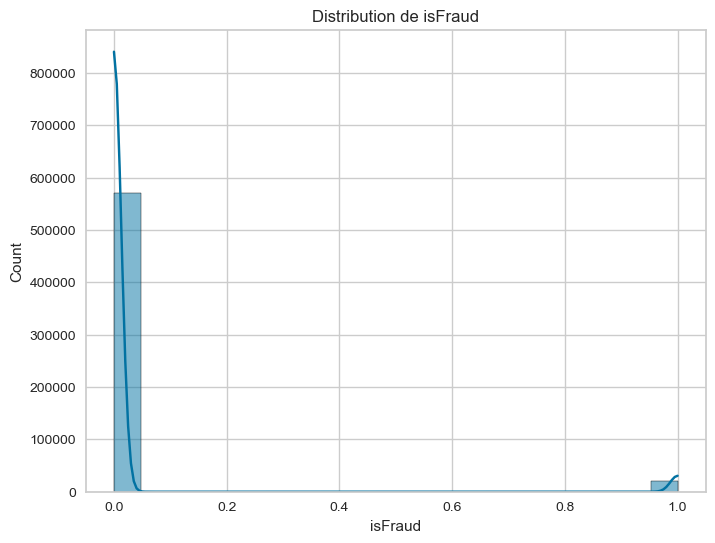

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


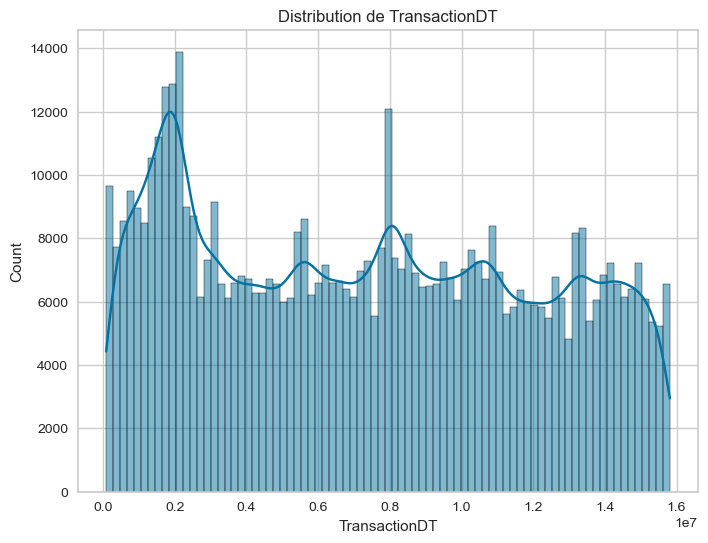

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


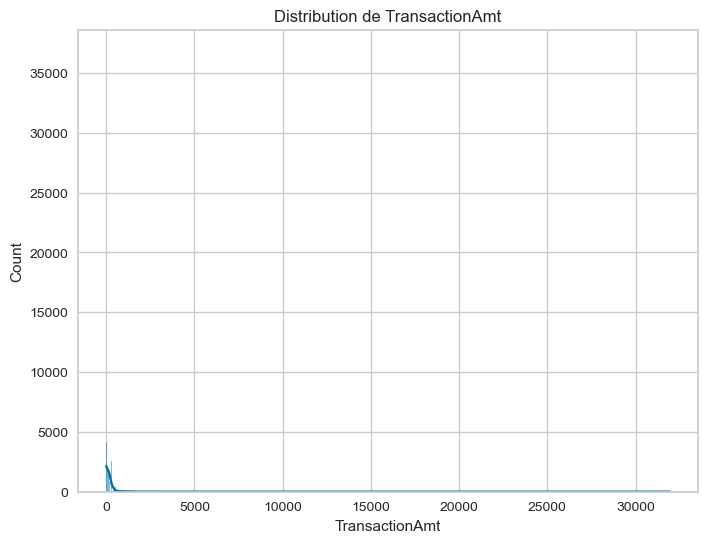

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


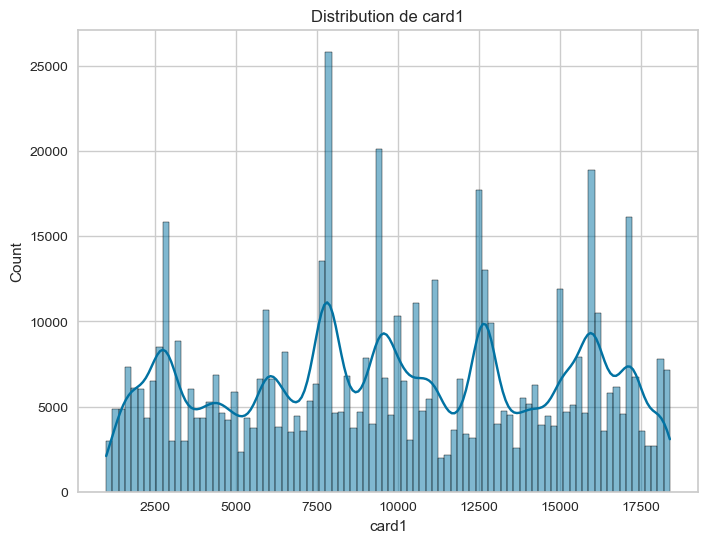

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


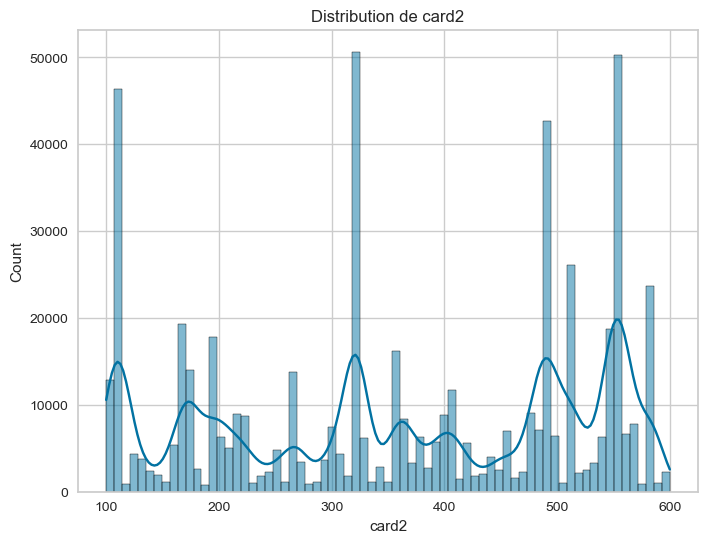

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


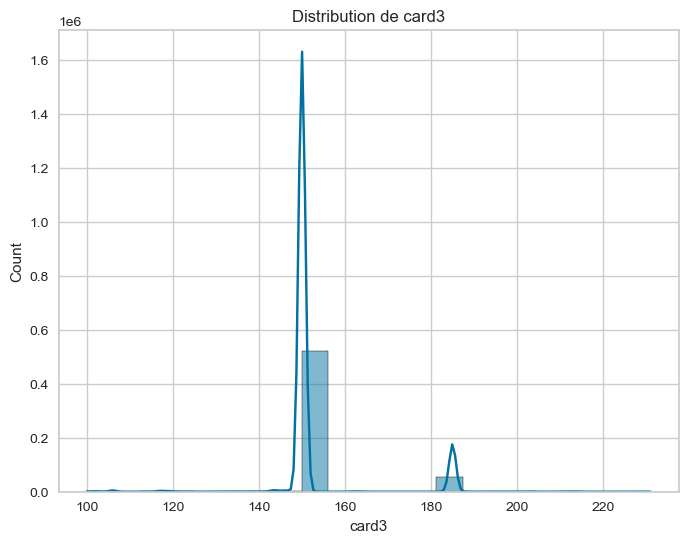

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


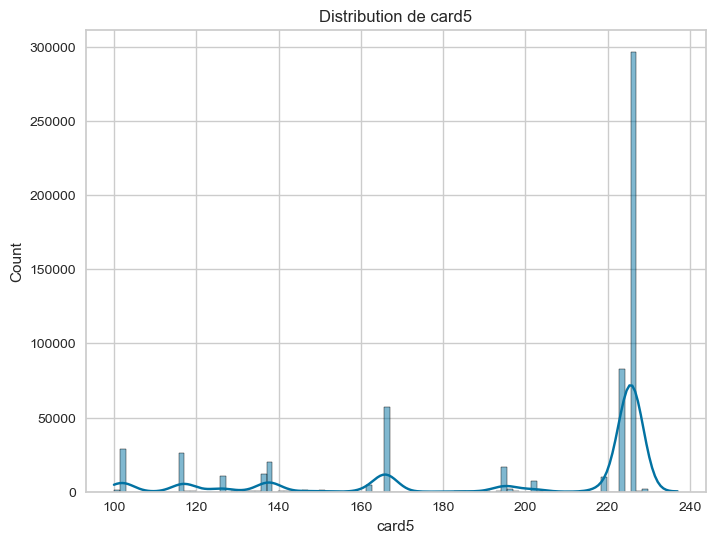

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


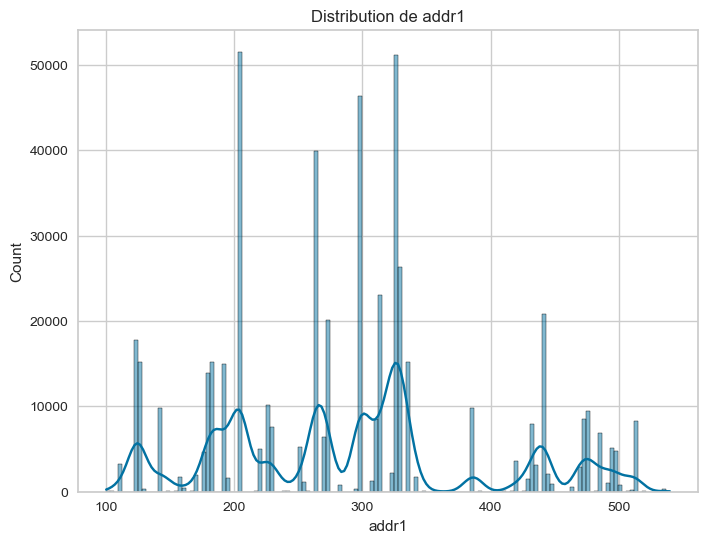

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


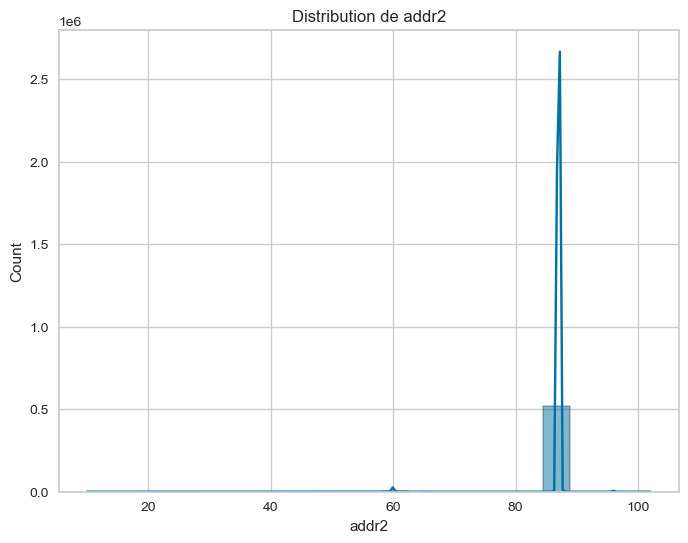

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


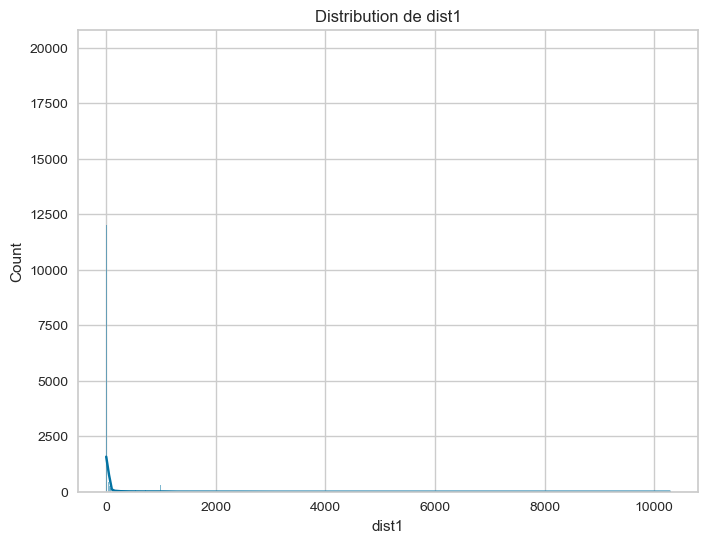

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


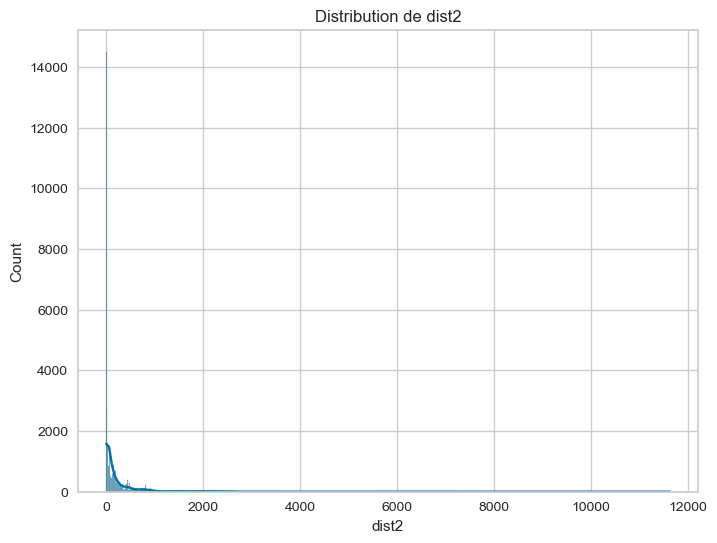

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


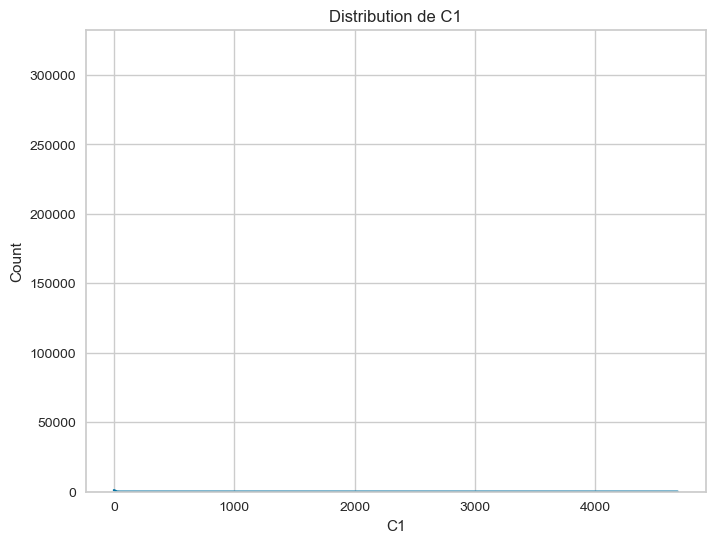

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


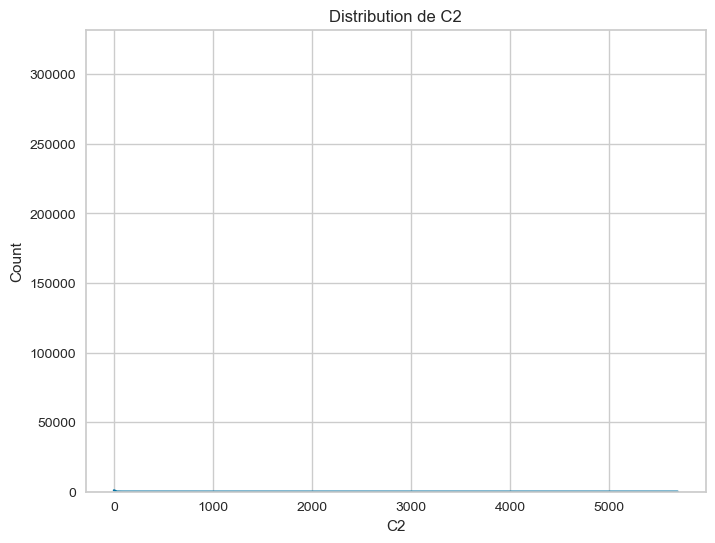

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


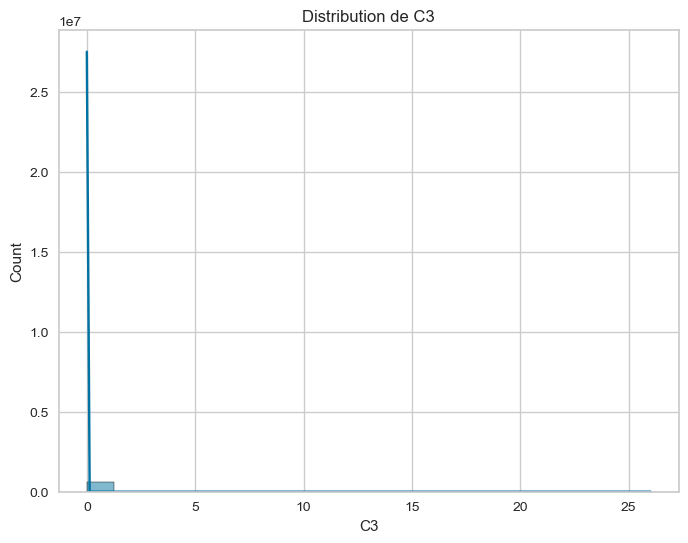

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


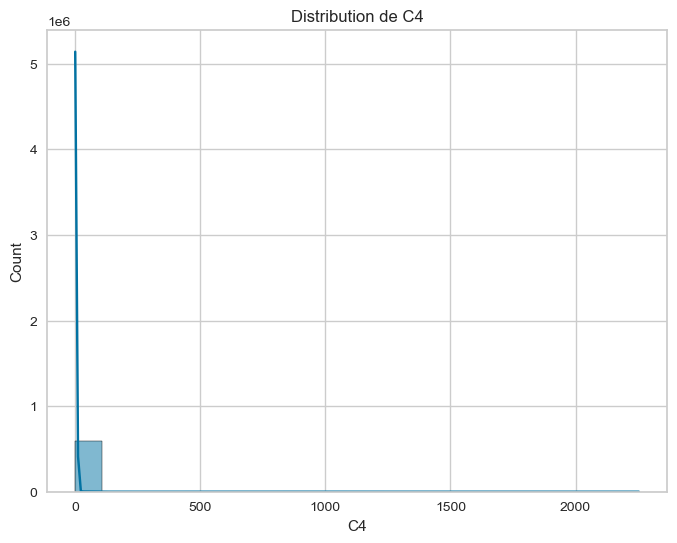

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


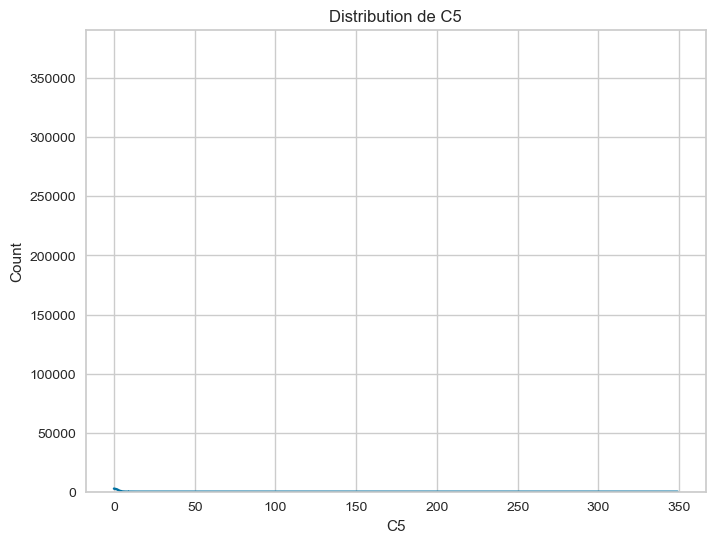

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


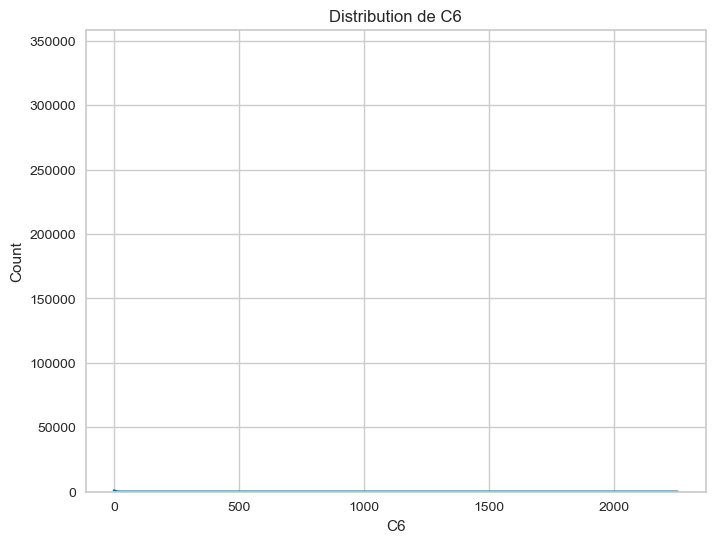

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


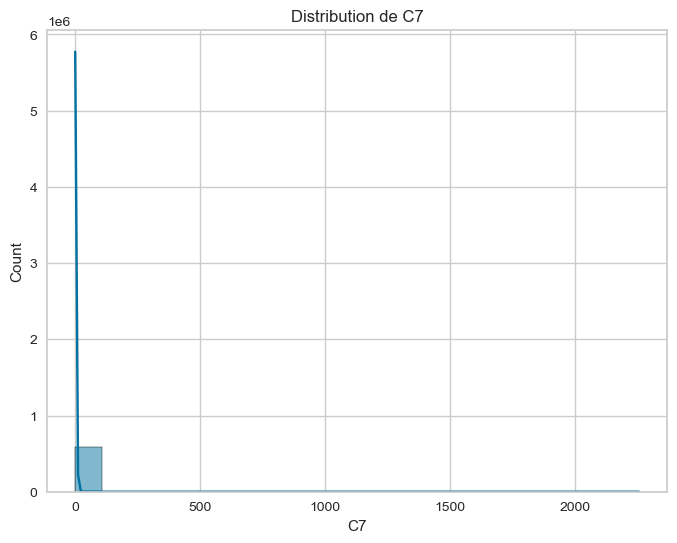

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


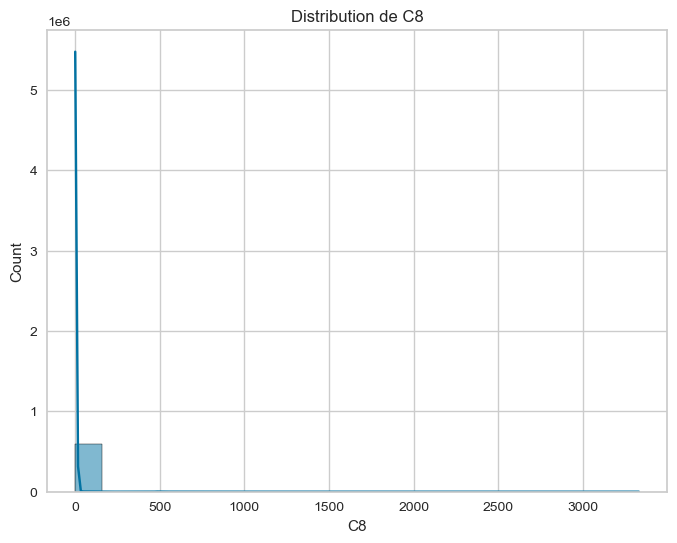

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


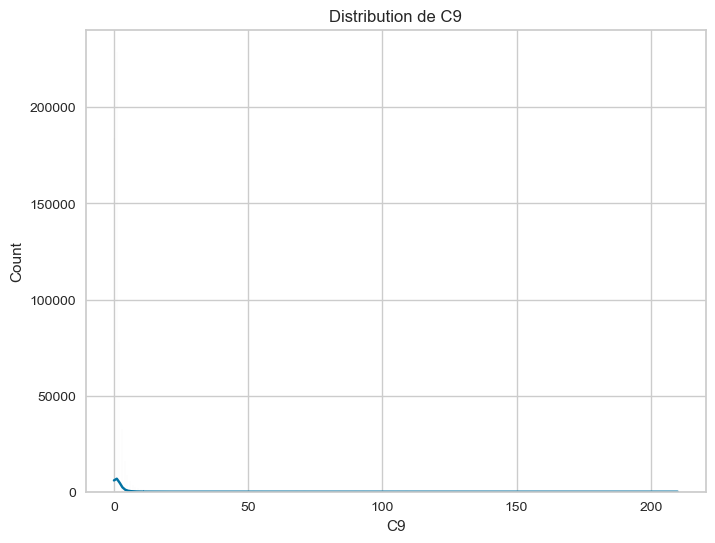

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


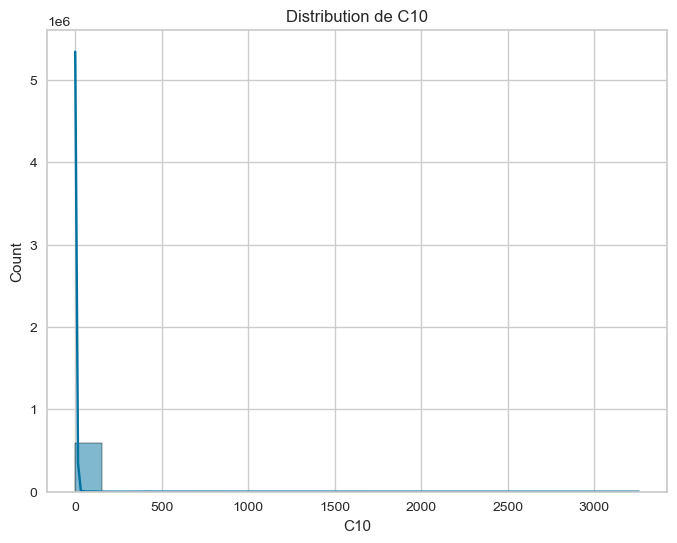

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


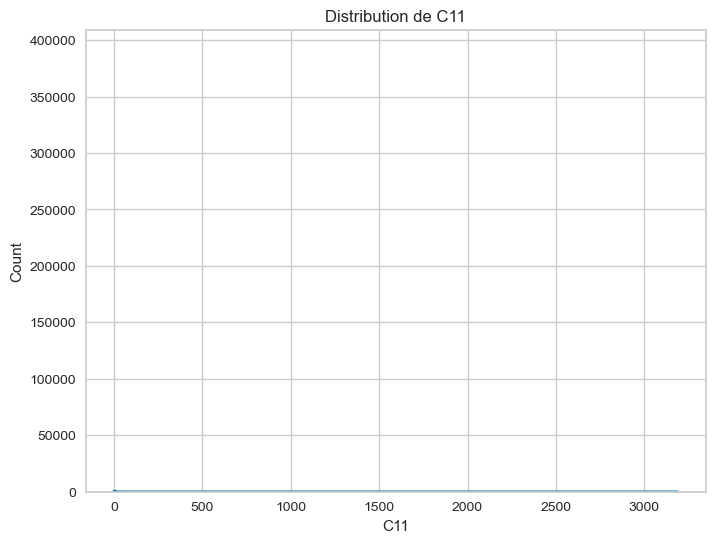

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


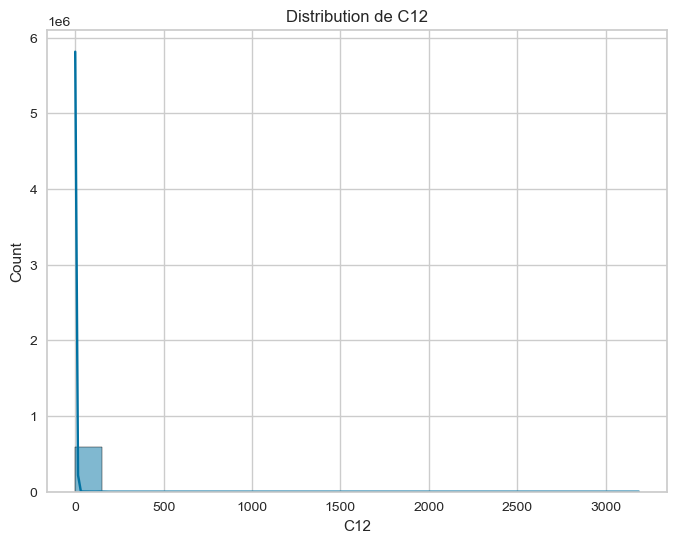

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


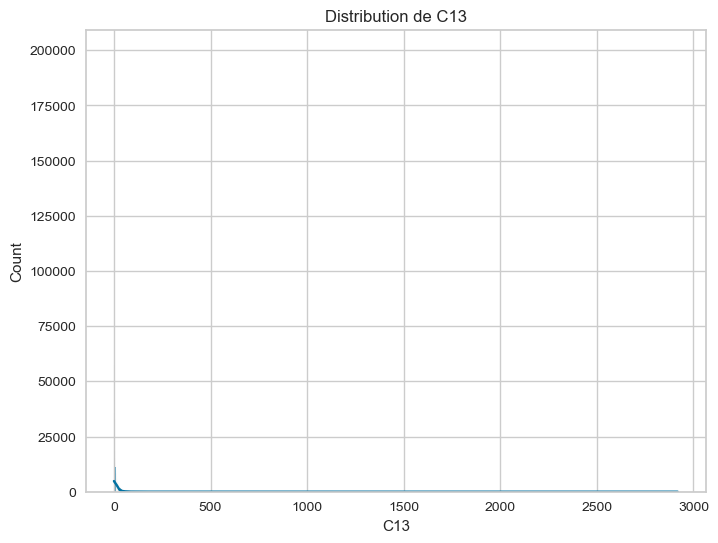

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


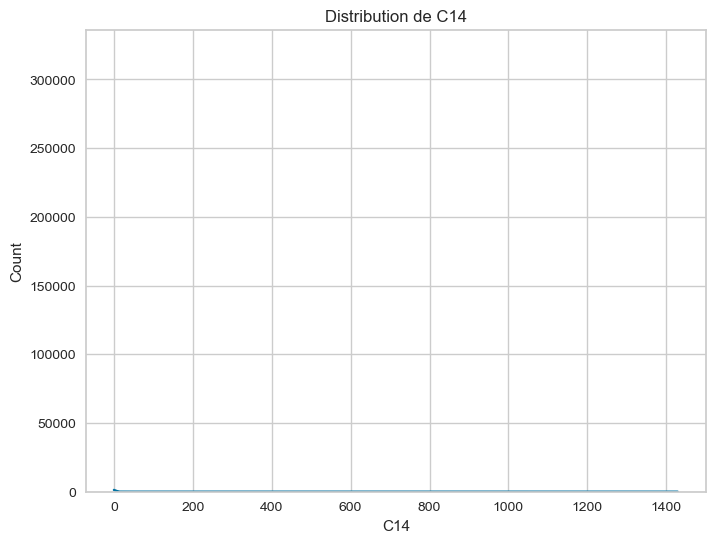

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


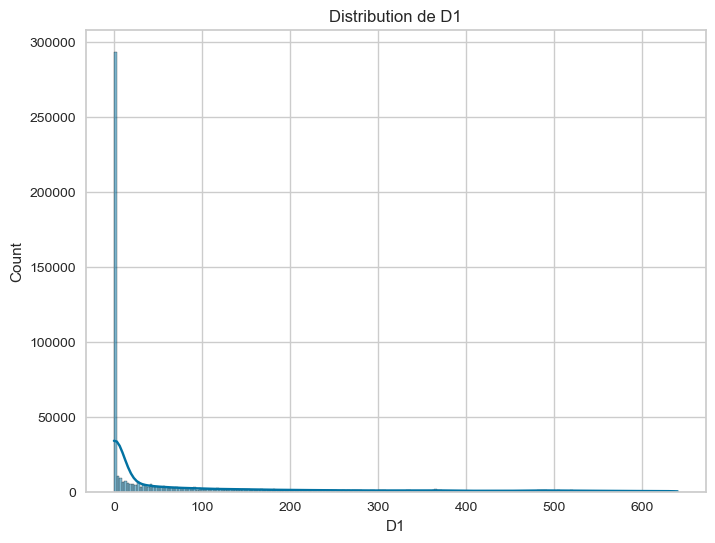

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


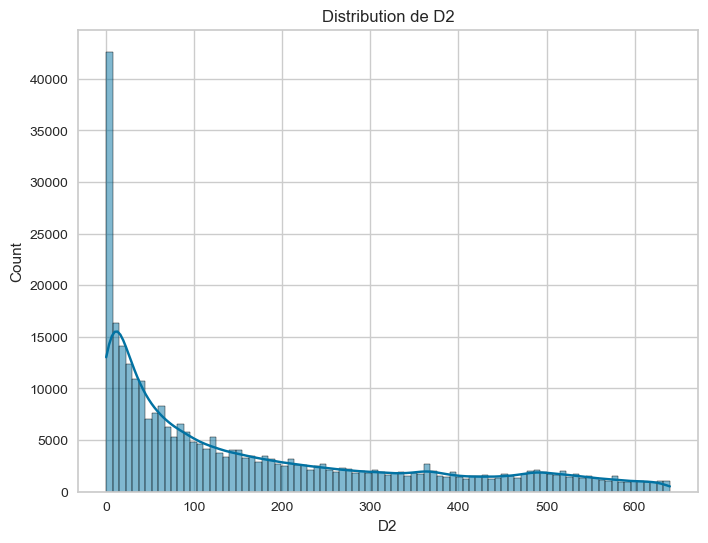

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


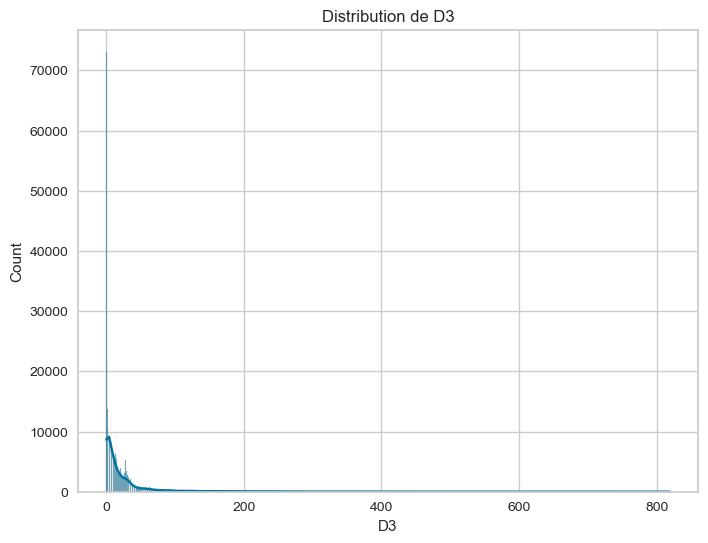

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


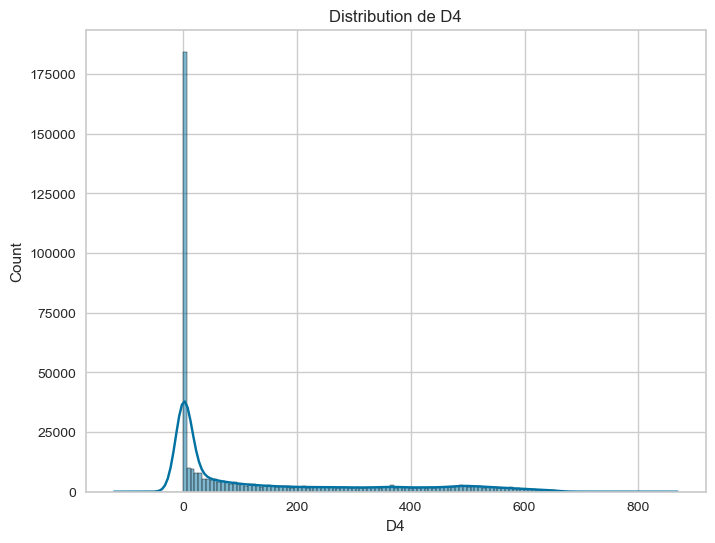

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


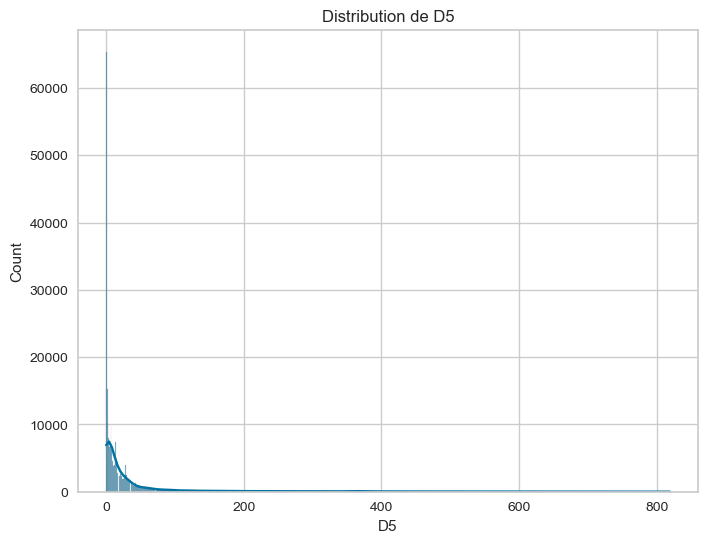

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


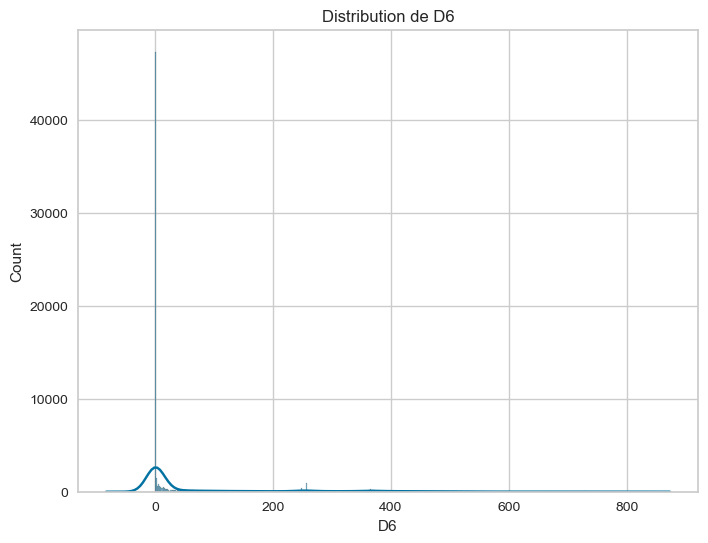

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


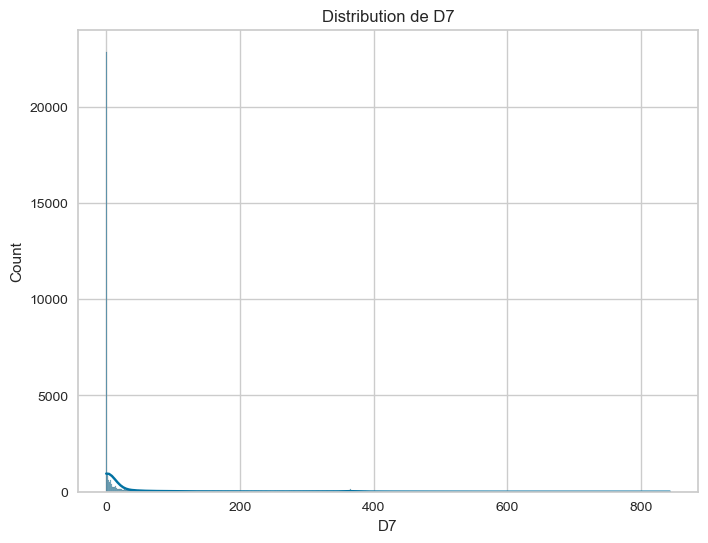

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


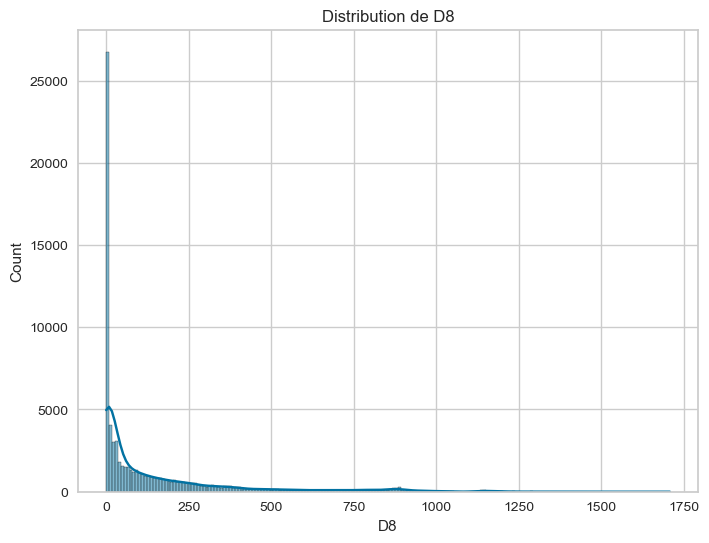

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


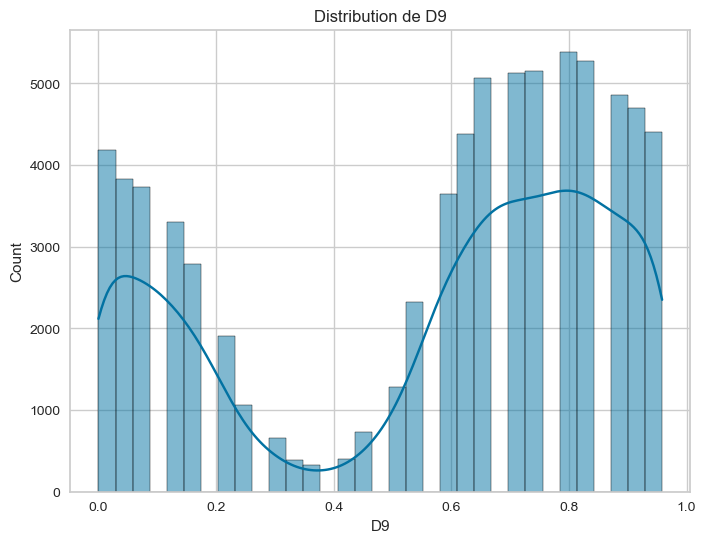

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


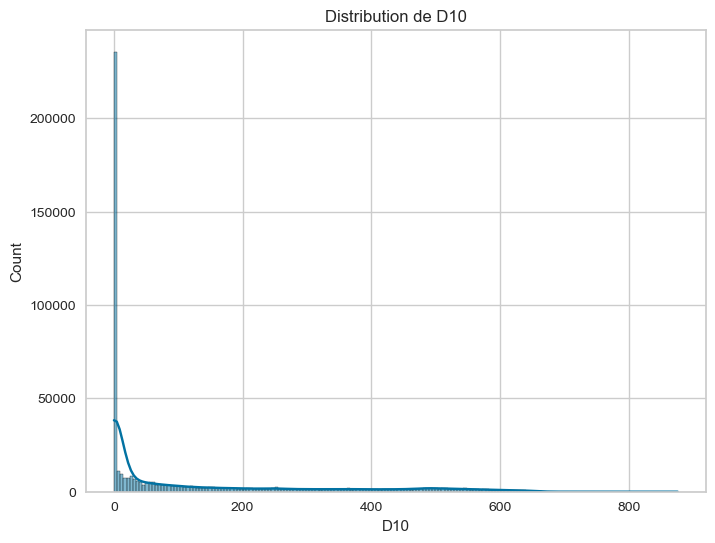

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


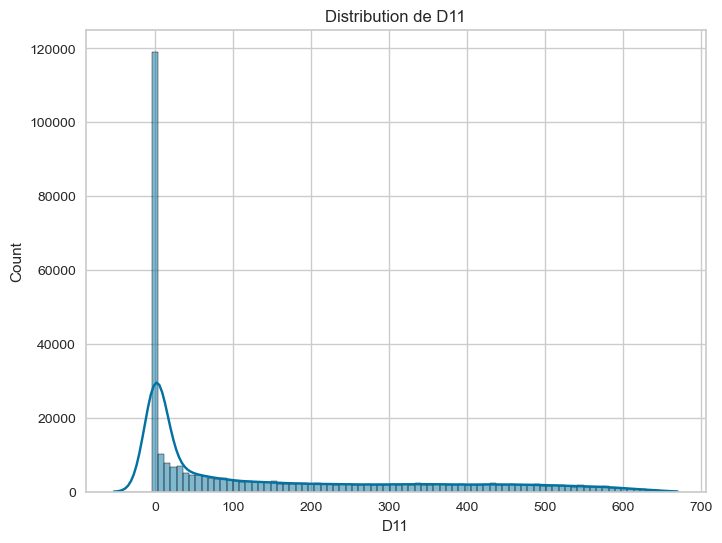

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


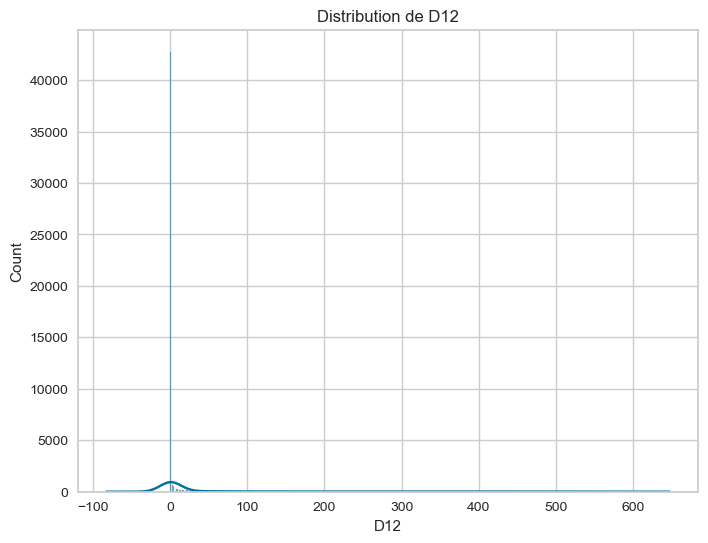

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


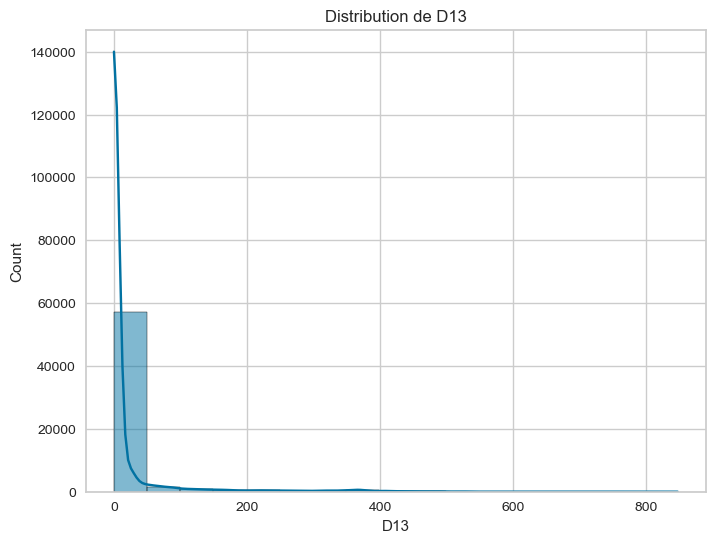

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


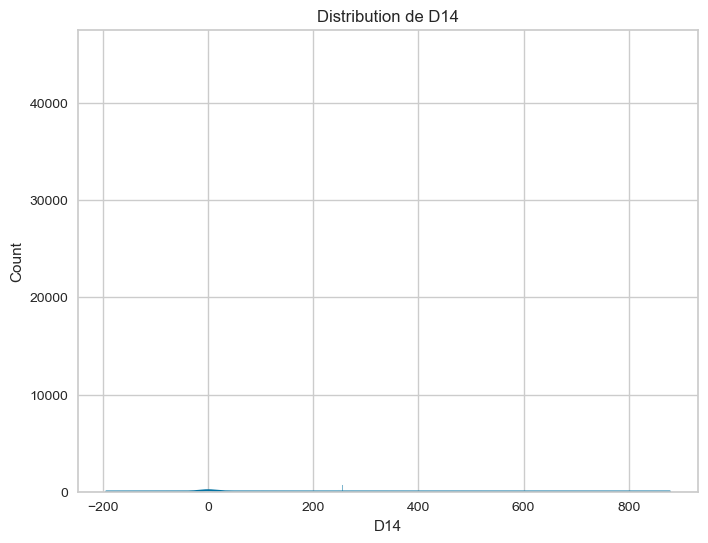

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


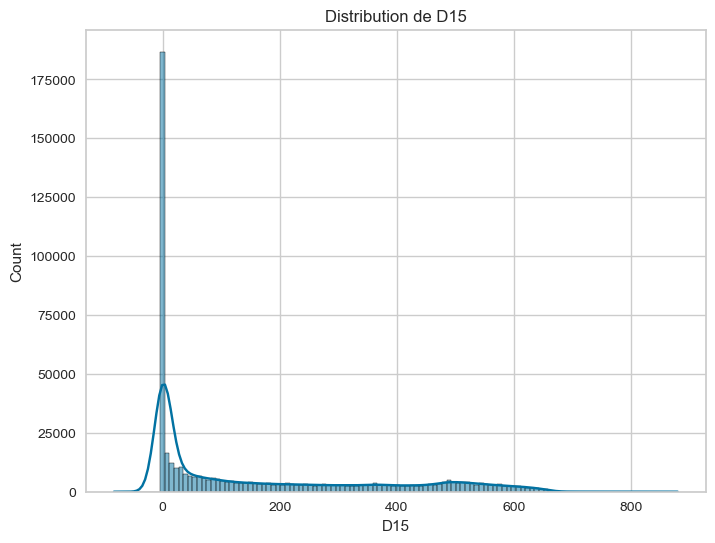

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


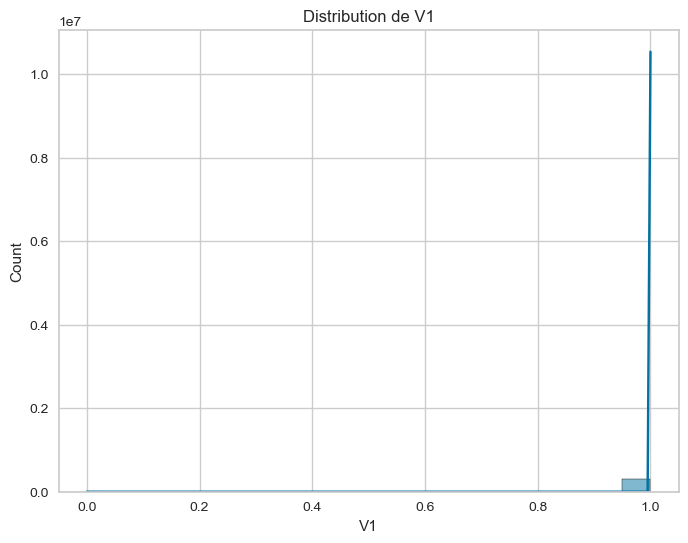

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


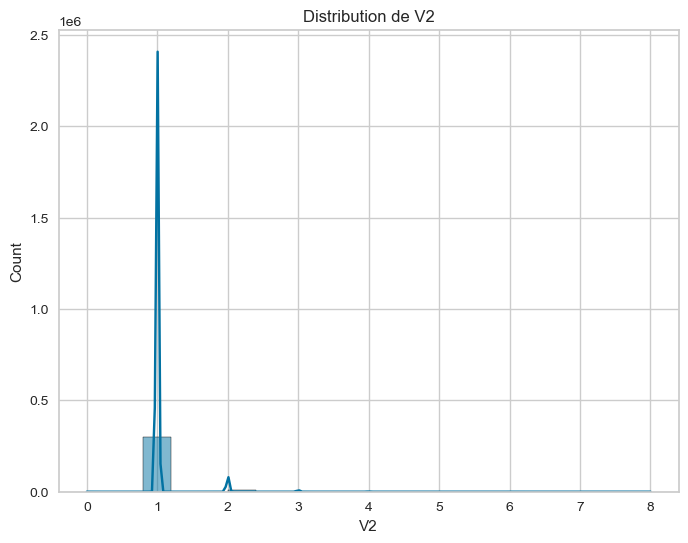

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


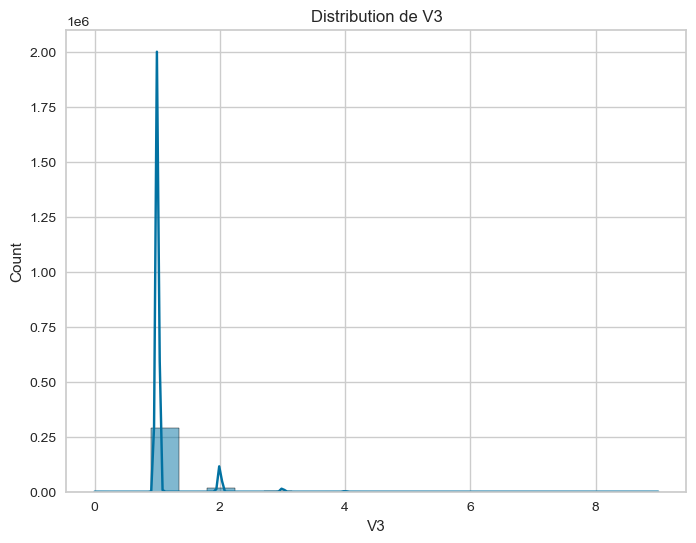

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


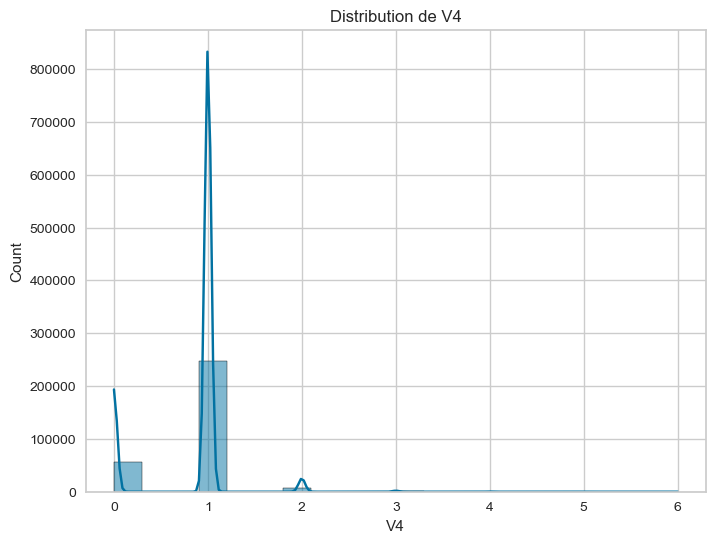

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


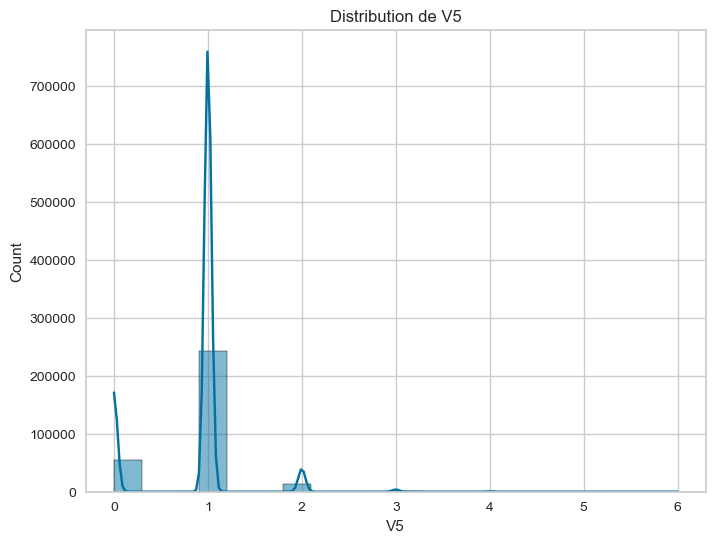

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


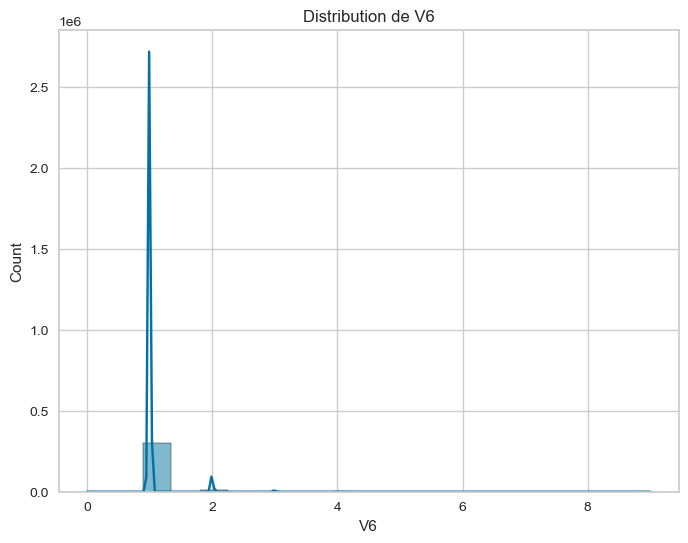

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


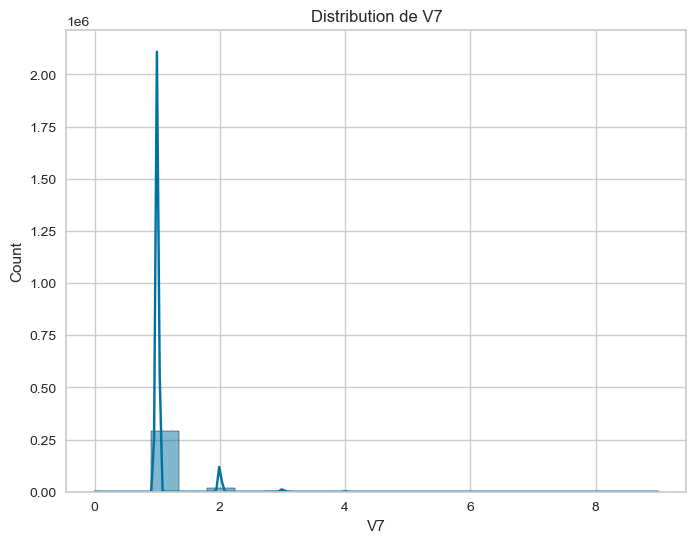

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


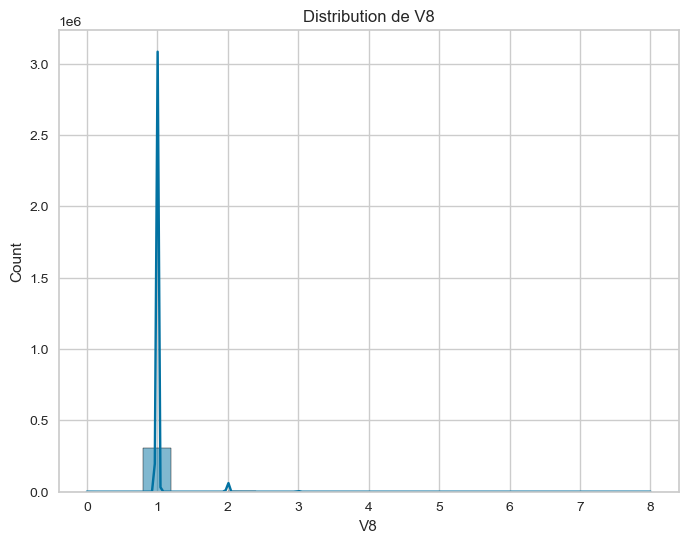

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


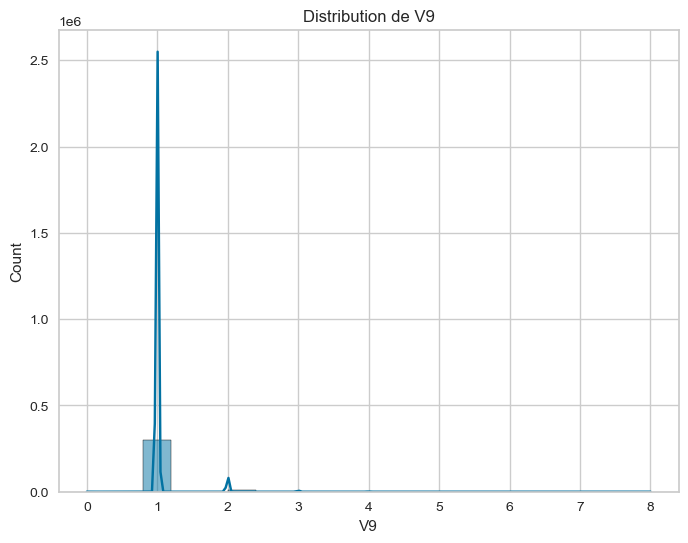

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


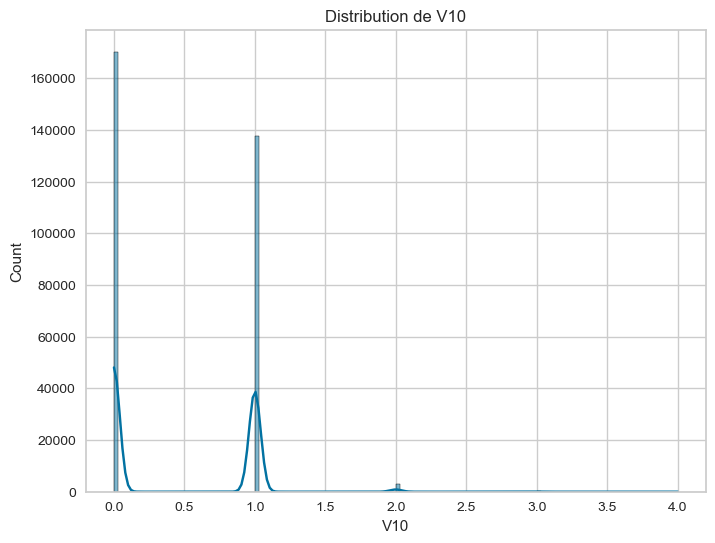

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


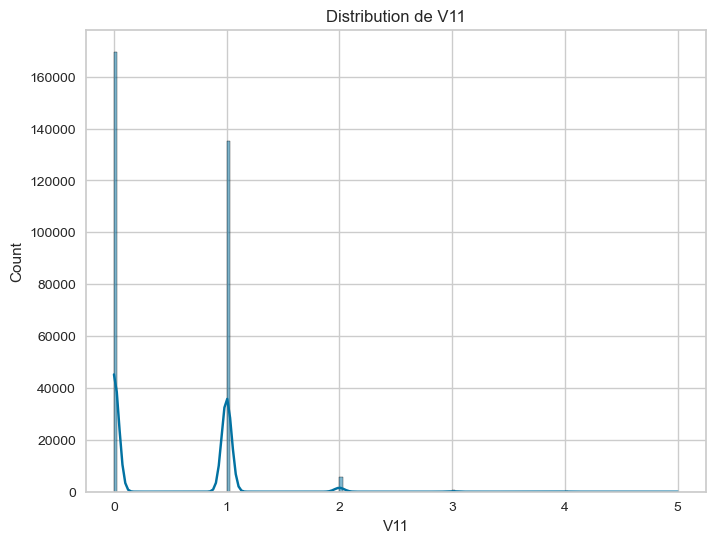

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


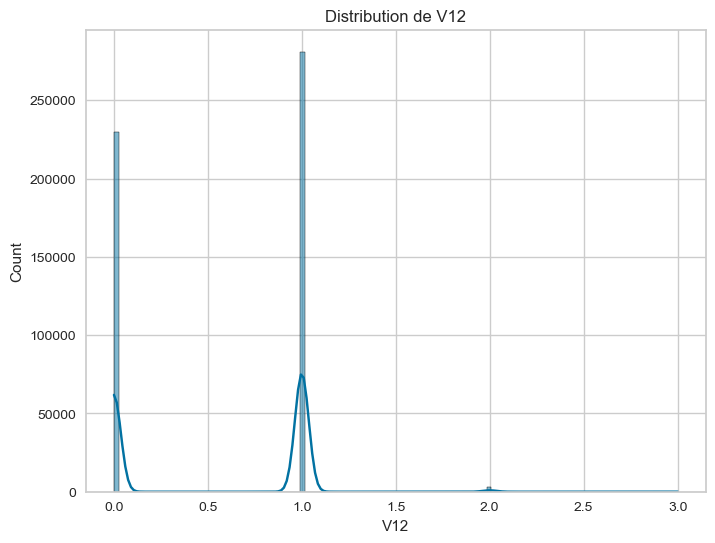

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


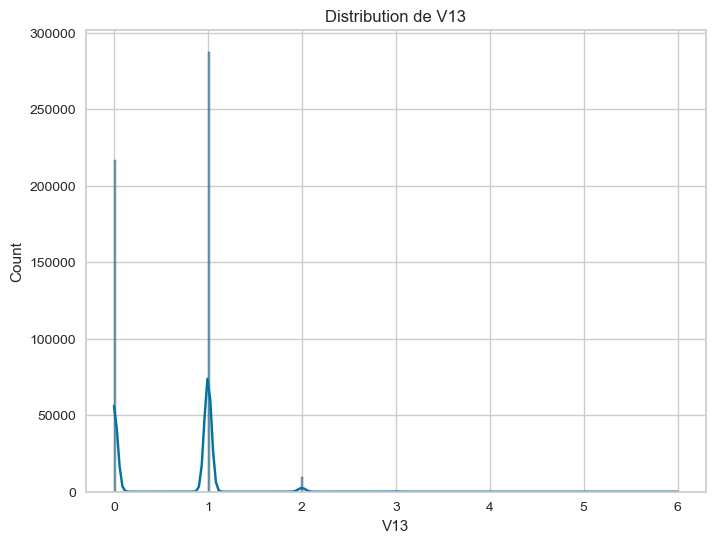

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


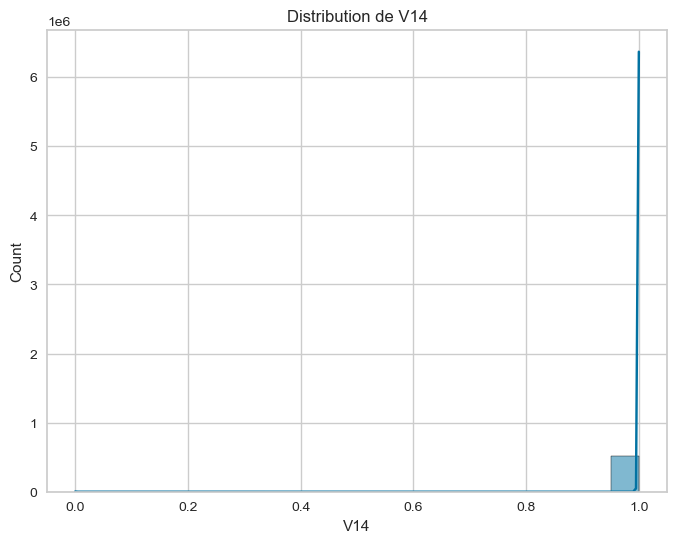

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


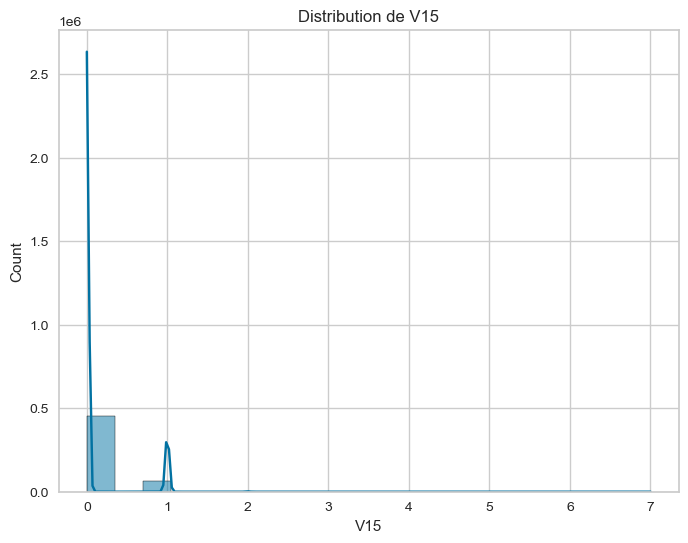

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


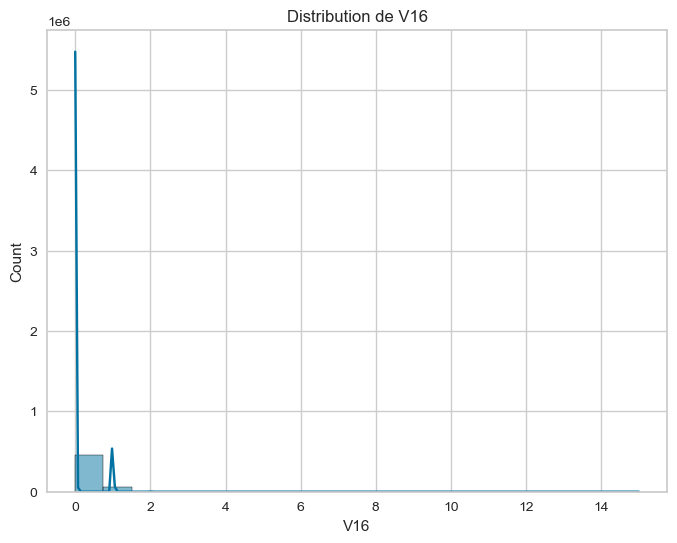

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


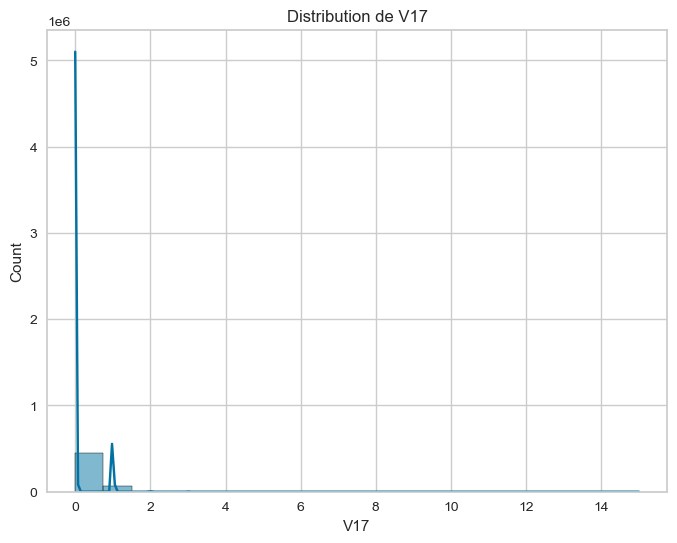

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


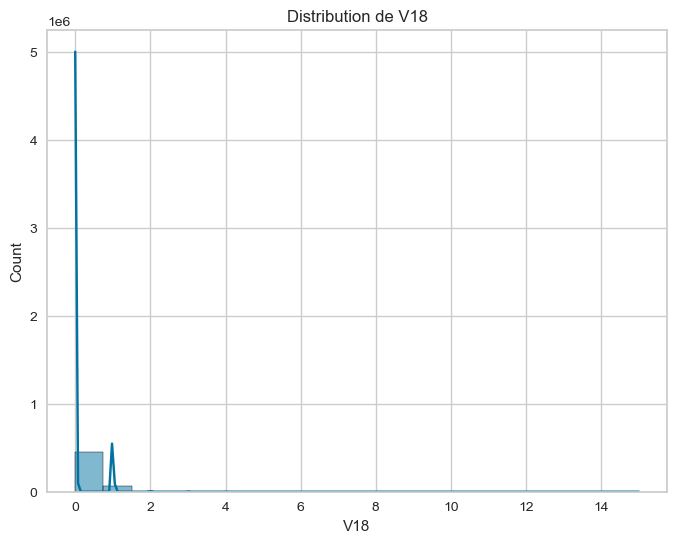

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


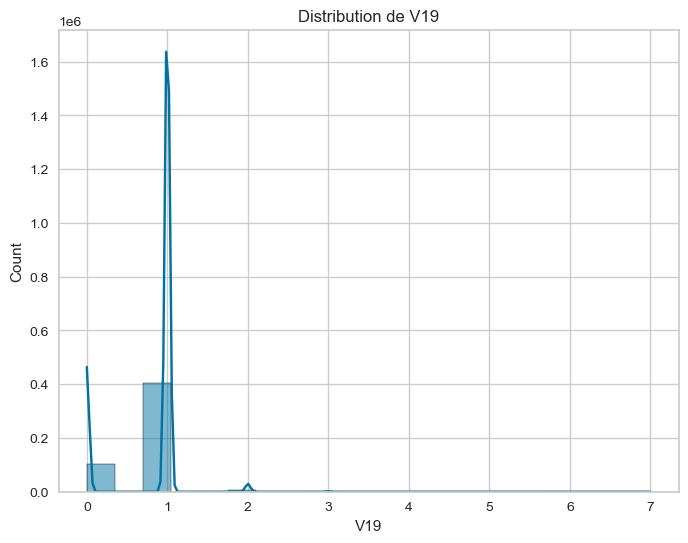

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


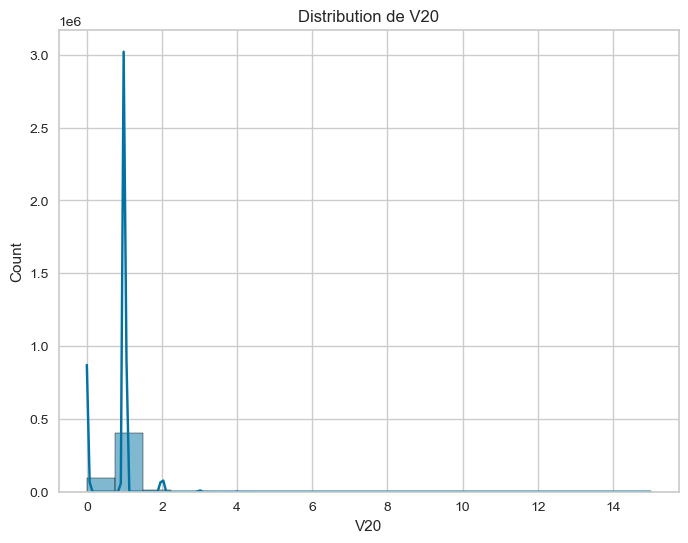

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


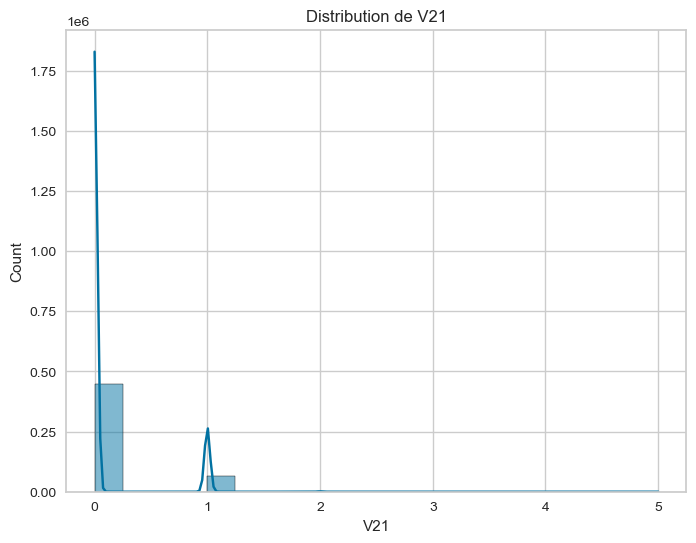

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


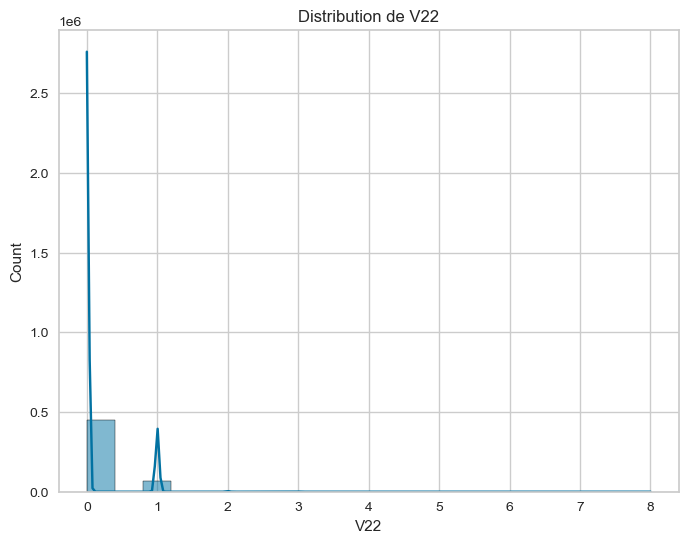

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


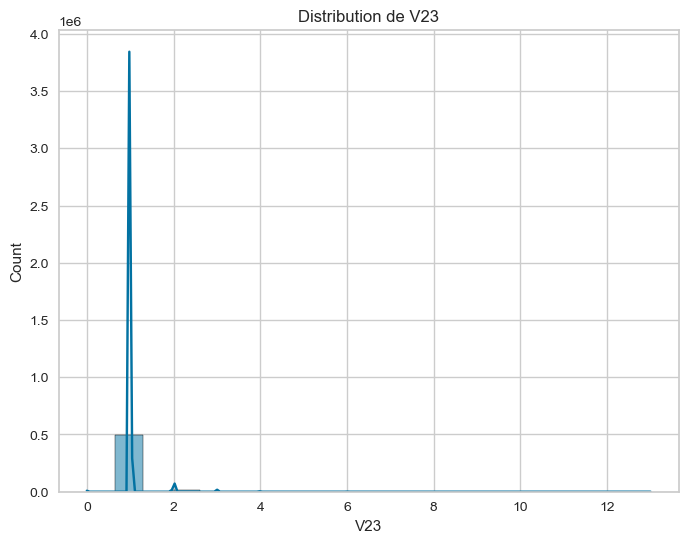

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


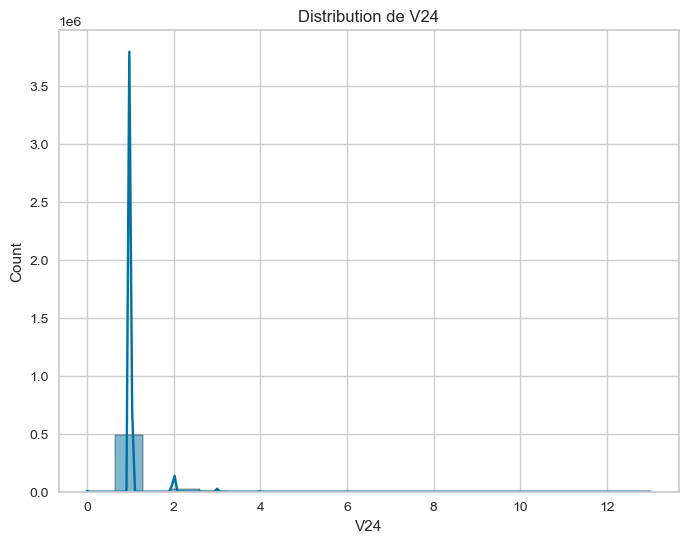

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


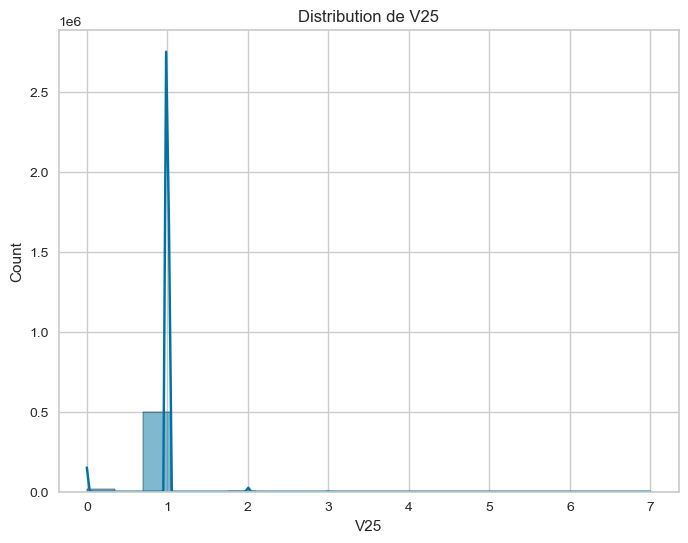

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


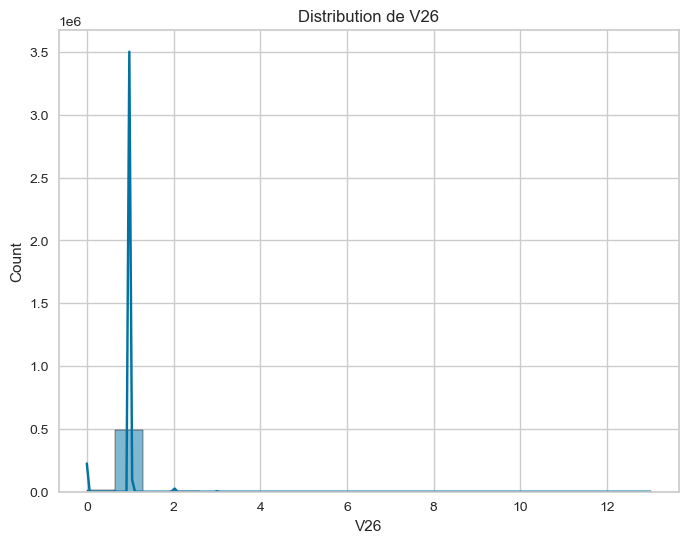

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


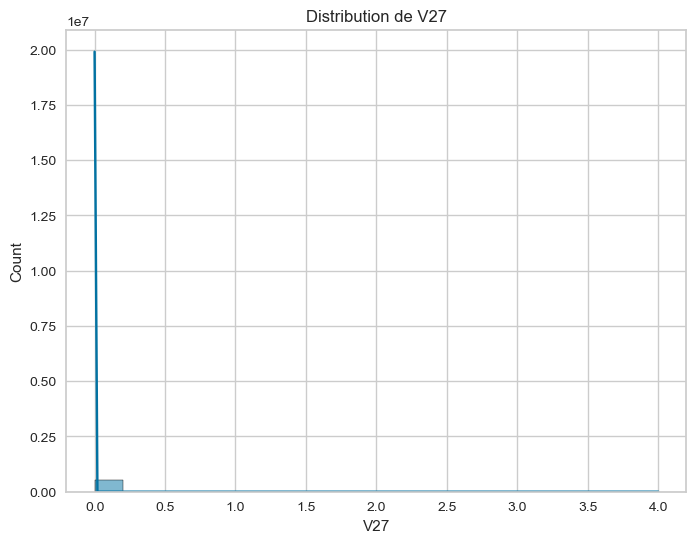

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


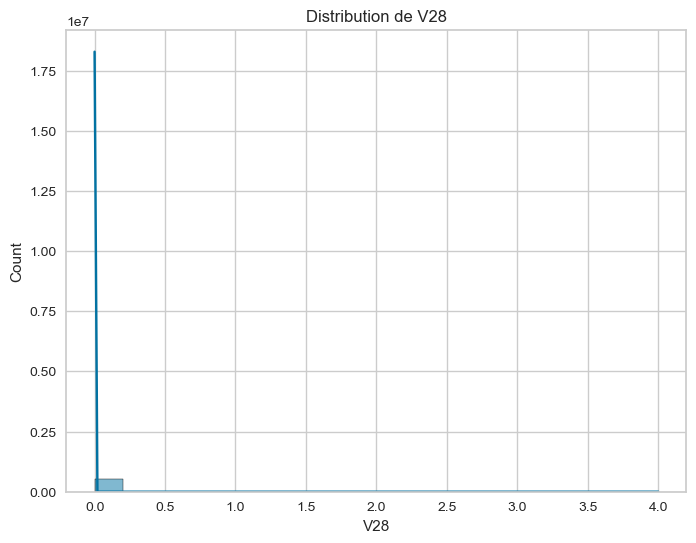

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


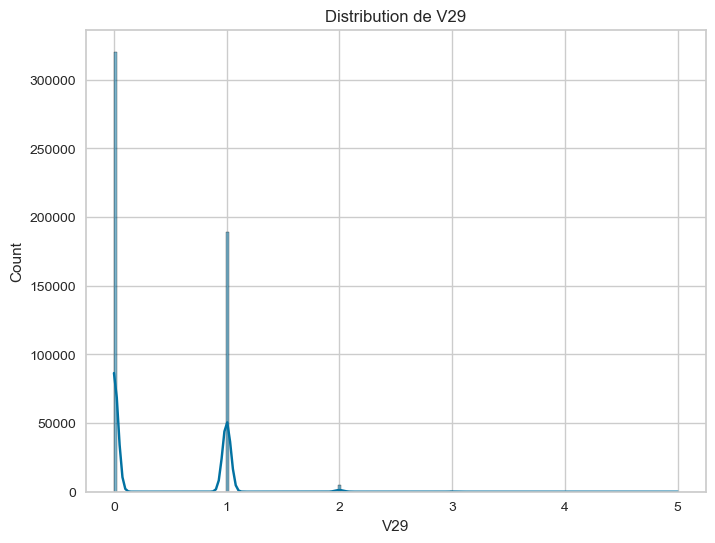

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


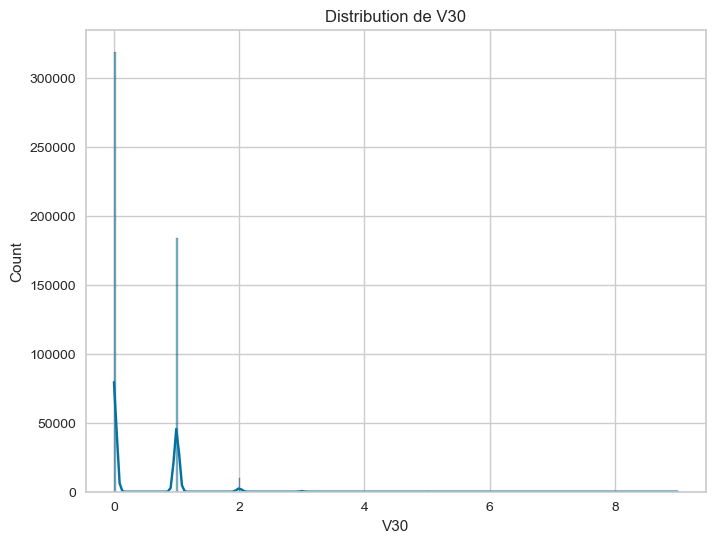

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


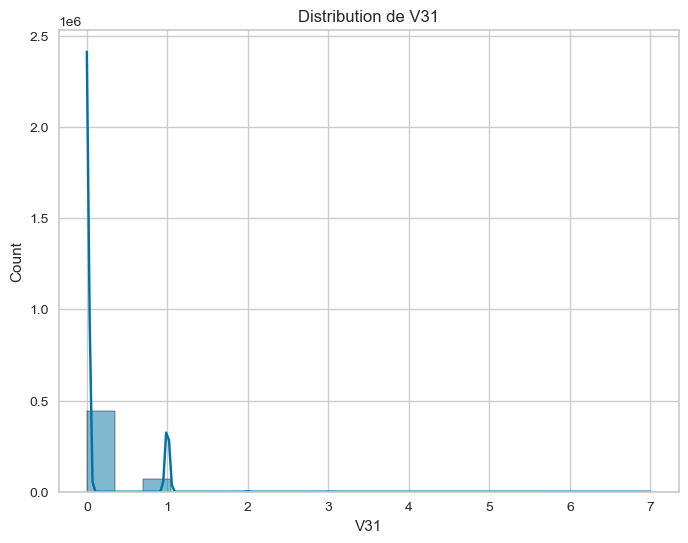

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


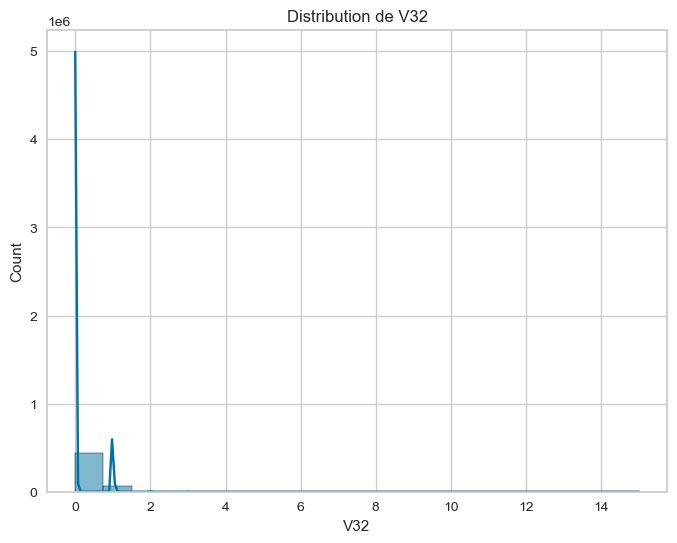

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


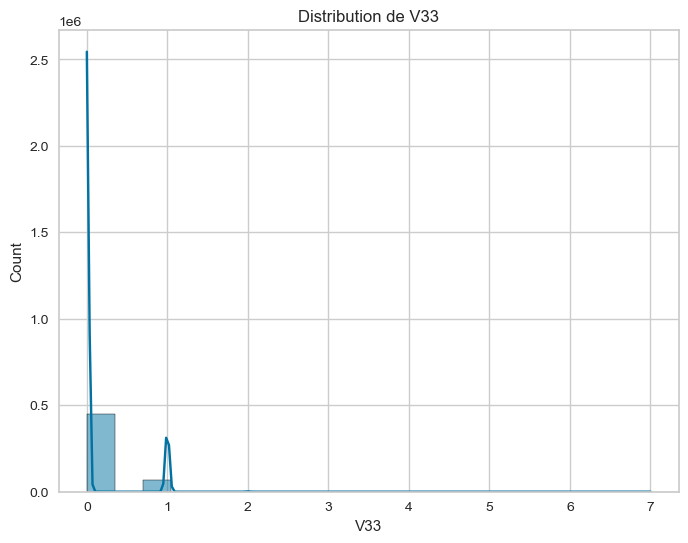

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

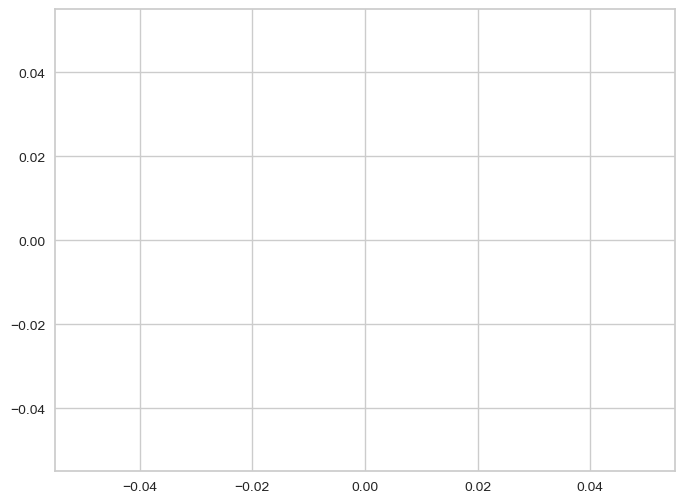

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Identification des variables catégorielles et numériques
categorical_cols = transaction.select_dtypes(include='object').columns
numerical_cols = transaction.select_dtypes(include=['number']).columns

print("Variables Catégorielles:", categorical_cols)
print("Variables Numériques:", numerical_cols)

# Visualisation des variables catégorielles
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=transaction, x=col)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.show()

# Visualisation des variables numériques
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(transaction[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.show()


In [143]:
identity.isnull().sum()


TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [127]:
identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [128]:
# Valeurs uniques 
def afficher_valeurs_uniques(df, nom_df="DataFrame"):
    print(f"Valeurs uniques par colonne dans {nom_df} :\n")
    for col in df.columns:
        uniques = df[col].unique()
        print(f"Colonne '{col}' ({len(uniques)} valeurs uniques) :")
        print(uniques)
        print("-" * 40)


afficher_valeurs_uniques(identity, "identity")


Valeurs uniques par colonne dans identity :

Colonne 'TransactionID' (144233 valeurs uniques) :
[2987004 2987008 2987010 ... 3577529 3577531 3577534]
----------------------------------------
Colonne 'id_01' (77 valeurs uniques) :
[   0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.  -90.
 -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.  -95.
  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.  -76.
  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.  -53.
  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.  -37.
  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.  -82.
  -48.  -63.  -71.  -56.  -51.]
----------------------------------------
Colonne 'id_02' (115656 valeurs uniques) :
[ 70787.  98945. 191631. ... 172059. 632381.  55528.]
----------------------------------------
Colonne 'id_03' (25 valeurs uniques) :
[ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7. 

In [129]:
# Fusionner les données
data = pd.merge(transaction, identity, on="TransactionID", how="left")

In [147]:
data.shape

(590540, 434)

In [116]:
# Nombre total de cellules dans la base
total_cells = data.size

# Nombre total de valeurs manquantes
total_missing = data.isnull().sum().sum()

# Pourcentage global de valeurs manquantes
missing_pct_total = (total_missing / total_cells) * 100

print(f"Pourcentage global de valeurs manquantes : {missing_pct_total:.2f}%")

Pourcentage global de valeurs manquantes : 45.07%


In [14]:
# y'a t'il des lignes valeurs manquantes?
missing_rows = data[data.isnull().all(axis=1)]

In [15]:
missing_rows

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo


In [16]:
# libérer la mémoire
del identity
del transaction


## View

In [17]:
def afficher_modalites(df):
    for col in df.columns:
        modalites = df[col].unique()
        print(f"\nVariable : '{col}'")
        print(f"Nombre de modalités : {len(modalites)}")
        print("Modalités :", modalites)

# Utilisation
afficher_modalites(df)


Variable : 'TransactionID'
Nombre de modalités : 590540
Modalités : [2987000 2987001 2987002 ... 3577537 3577538 3577539]

Variable : 'isFraud'
Nombre de modalités : 2
Modalités : [0 1]

Variable : 'TransactionDT'
Nombre de modalités : 573349
Modalités : [   86400    86401    86469 ... 15811079 15811088 15811131]

Variable : 'TransactionAmt'
Nombre de modalités : 20902
Modalités : [  68.5    29.     59.   ...  557.54 1659.95  400.78]

Variable : 'ProductCD'
Nombre de modalités : 5
Modalités : ['W' 'H' 'C' 'S' 'R']

Variable : 'card1'
Nombre de modalités : 13553
Modalités : [13926  2755  4663 ... 13166  8767 18038]

Variable : 'card2'
Nombre de modalités : 501
Modalités : [ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158.

In [18]:
# voir les variables par types
def count_variable_types(df):
    type_counts = df.dtypes.value_counts()
    print("Nombre de variables par type :")
    for dtype, count in type_counts.items():
        print(f"{dtype} : {count}")


In [19]:
count_variable_types(data)

Nombre de variables par type :
float64 : 399
object : 31
int64 : 4


In [20]:
numeric_cols = df.select_dtypes(include=['int64',  'float64']).columns

In [21]:
numeric_cols

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)

In [149]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [150]:
categorical_cols

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [151]:

for col_name in categorical_cols:
    # Calcul des effectifs croisés entre la variable et isFraud
    counts = data.groupby([col_name, 'isFraud']).size().unstack(fill_value=0)
    
    print(f"\nTableau d'effectifs pour {col_name} :")
    print(counts)



Tableau d'effectifs pour ProductCD :
isFraud         0     1
ProductCD              
C           60511  8008
H           31450  1574
R           36273  1426
S           10942   686
W          430701  8969

Tableau d'effectifs pour card4 :
isFraud                0      1
card4                          
american express    8089    239
discover            6137    514
mastercard        182721   6496
visa              371394  13373

Tableau d'effectifs pour card6 :
isFraud               0      1
card6                         
charge card          15      0
credit           139036   9950
debit            429264  10674
debit or credit      30      0

Tableau d'effectifs pour P_emaildomain :
isFraud                0     1
P_emaildomain                 
aim.com              275    40
anonymous.com      36139   859
aol.com            27672   617
att.net             4003    30
bellsouth.net       1856    53
cableone.net         156     3
centurylink.net      205     0
cfl.rr.com           172   

In [24]:
# Nombre de valeurs uniques dans les colonnes de type 'object'

def inspect_object_columns(df):
    
    print("Nombre de valeurs uniques dans les colonnes de type 'object' :\n")
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        unique_count = df[col].nunique()
        total_count = len(df[col])
        print(f"{col}: {unique_count} valeurs uniques sur {total_count} lignes ")

# f"({100 * unique_count / total_count:.6f}%)"

In [25]:
# Valeurs min et max des colonnes numériques

def inspect_numeric_columns(df):
    print("Valeurs min et max des colonnes numériques :\n")
    numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns
    for col in numeric_cols:
        print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

In [133]:
# Percentage of Nan

for col in data.columns:
    print(col,'le nombre de NaN est:',data[col].isnull().sum(),end=" ")
    print('le pourcentage de NaN est:',np.round(data[col].isnull().sum()/data.shape[0]*100,6),'%')

TransactionID le nombre de NaN est: 0 le pourcentage de NaN est: 0.0 %
isFraud le nombre de NaN est: 0 le pourcentage de NaN est: 0.0 %
TransactionDT le nombre de NaN est: 0 le pourcentage de NaN est: 0.0 %
TransactionAmt le nombre de NaN est: 0 le pourcentage de NaN est: 0.0 %
ProductCD le nombre de NaN est: 0 le pourcentage de NaN est: 0.0 %
card1 le nombre de NaN est: 0 le pourcentage de NaN est: 0.0 %
card2 le nombre de NaN est: 8933 le pourcentage de NaN est: 1.512683 %
card3 le nombre de NaN est: 1565 le pourcentage de NaN est: 0.265012 %
card4 le nombre de NaN est: 1577 le pourcentage de NaN est: 0.267044 %
card5 le nombre de NaN est: 4259 le pourcentage de NaN est: 0.721204 %
card6 le nombre de NaN est: 1571 le pourcentage de NaN est: 0.266028 %
addr1 le nombre de NaN est: 65706 le pourcentage de NaN est: 11.126427 %
addr2 le nombre de NaN est: 65706 le pourcentage de NaN est: 11.126427 %
dist1 le nombre de NaN est: 352271 le pourcentage de NaN est: 59.652352 %
dist2 le nombre 

In [27]:
inspect_numeric_columns(data)


Valeurs min et max des colonnes numériques :

TransactionID: min = 2987000, max = 3577539
isFraud: min = 0, max = 1
TransactionDT: min = 86400, max = 15811131
TransactionAmt: min = 0.251, max = 31937.391
card1: min = 1000, max = 18396
card2: min = 100.0, max = 600.0
card3: min = 100.0, max = 231.0
card5: min = 100.0, max = 237.0
addr1: min = 100.0, max = 540.0
addr2: min = 10.0, max = 102.0
dist1: min = 0.0, max = 10286.0
dist2: min = 0.0, max = 11623.0
C1: min = 0.0, max = 4685.0
C2: min = 0.0, max = 5691.0
C3: min = 0.0, max = 26.0
C4: min = 0.0, max = 2253.0
C5: min = 0.0, max = 349.0
C6: min = 0.0, max = 2253.0
C7: min = 0.0, max = 2255.0
C8: min = 0.0, max = 3331.0
C9: min = 0.0, max = 210.0
C10: min = 0.0, max = 3257.0
C11: min = 0.0, max = 3188.0
C12: min = 0.0, max = 3188.0
C13: min = 0.0, max = 2918.0
C14: min = 0.0, max = 1429.0
D1: min = 0.0, max = 640.0
D2: min = 0.0, max = 640.0
D3: min = 0.0, max = 819.0
D4: min = -122.0, max = 869.0
D5: min = 0.0, max = 819.0
D6: min = -

In [28]:
inspect_object_columns(data)

Nombre de valeurs uniques dans les colonnes de type 'object' :

ProductCD: 5 valeurs uniques sur 590540 lignes 
card4: 4 valeurs uniques sur 590540 lignes 
card6: 4 valeurs uniques sur 590540 lignes 
P_emaildomain: 59 valeurs uniques sur 590540 lignes 
R_emaildomain: 60 valeurs uniques sur 590540 lignes 
M1: 2 valeurs uniques sur 590540 lignes 
M2: 2 valeurs uniques sur 590540 lignes 
M3: 2 valeurs uniques sur 590540 lignes 
M4: 3 valeurs uniques sur 590540 lignes 
M5: 2 valeurs uniques sur 590540 lignes 
M6: 2 valeurs uniques sur 590540 lignes 
M7: 2 valeurs uniques sur 590540 lignes 
M8: 2 valeurs uniques sur 590540 lignes 
M9: 2 valeurs uniques sur 590540 lignes 
id_12: 2 valeurs uniques sur 590540 lignes 
id_15: 3 valeurs uniques sur 590540 lignes 
id_16: 2 valeurs uniques sur 590540 lignes 
id_23: 3 valeurs uniques sur 590540 lignes 
id_27: 2 valeurs uniques sur 590540 lignes 
id_28: 2 valeurs uniques sur 590540 lignes 
id_29: 2 valeurs uniques sur 590540 lignes 
id_30: 75 valeurs

In [33]:
# Pour card1-card6
print("Valeurs uniques de card1 :", data['card1'].unique())

# Pour id_12
print("Répartition des variables remplacées par missing :")
print(data[by_missing].value_counts(dropna=False))



Valeurs uniques de card1 : [13926, 2755, 4663, 18132, 4497, ..., 7236, 17972, 13166, 8767, 18038]
Length: 13553
Categories (13553, int64): [1000, 1001, 1004, 1005, ..., 18391, 18393, 18395, 18396]
Répartition des variables remplacées par missing :
id_12     addr1  
NotFound  missing    60223
missing   325.0      37545
          204.0      36190
          299.0      35626
          264.0      35551
                     ...  
NotFound  117.0          1
          280.0          1
missing   255.0          1
NotFound  467.0          1
          139.0          1
Name: count, Length: 499, dtype: int64


In [53]:
def afficher_modalites_variable(df, variable):
    if variable in df.columns:
        modalites = df[variable].unique()
        print(f"\nVariable : '{variable}'")
        print(f"Nombre de modalités : {len(modalites)}")
        print("Modalités :", modalites)
    else:
        print(f"La variable '{variable}' n'existe pas dans le DataFrame.")


In [54]:
afficher_modalites_variable(data, 'addr1')


Variable : 'addr1'
Nombre de modalités : 333
Modalités : [315.0, 325.0, 330.0, 476.0, 420.0, ..., 286.0, 507.0, 457.0, 268.0, 245.0]
Length: 333
Categories (333, object): [100.0, 101.0, 102.0, 104.0, ..., 535.0, 536.0, 540.0, 'missing']


In [55]:
# voir les variables par types
def count_variable_types(df):
    type_counts = df.dtypes.value_counts()
    print("Nombre de variables par type :")
    for dtype, count in type_counts.items():
        print(f"{dtype} : {count}")


In [59]:
count_variable_types(data)

Nombre de variables par type :
float64 : 170
int32 : 2
category : 1
category : 1
category : 1
category : 1
category : 1
category : 1
category : 1
category : 1
category : 1


In [60]:
print("Mininum date du dataset:",min(data['TransactionDT']))
print("Maximum date du dataset:",max(data['TransactionDT']))

print("Timespan en jours:",(max(data['TransactionDT'])-min(data['TransactionDT']))/(3600*24))

Mininum date du dataset: 86400
Maximum date du dataset: 15811131
Timespan en jours: 181.99920138888888


In [61]:
# voir si le dataset est croissant dans le temps
is_sorted = data['TransactionDT'].is_monotonic_increasing
print(is_sorted)


True
